# **Titanic : An Interactive & very Detailed Analysis**


*Author : Indiano*

*September 2018*

---

## Content


 1. Introduction (5 min)
     * Objective
     * Description
 2. Data Understanding (15 min)
    * Import Libraries
    * Load data
    * Statistical summaries and visualisations
    * Excersises
 3. Data Preparation (5 min)
    * Missing values imputation
    * Feature Engineering
 4. Modeling (5 min)
     * Build the model
 5. Evaluation (25 min)
     * Model performance
     * Feature importance
     * Who gets the best performing model?
 6. Deployment  (5 min)
     * Submit result to Kaggle leaderboard     

[Adopted from Cross Industry Standard Process for Data Mining (CRISP-DM)](http://www.sv-europe.com/crisp-dm-methodology/)

![CripsDM](https://www.otaris.de/wp-content/uploads/2015/11/CRISP-DM.png "Process diagram showing the relationship between the different phases of CRISP-DM")

# 1. Introduction

[Based on Kaggle Titanic competition](https://www.kaggle.com/c/titanic)

## 1.1 Objective

Predict survival of passengers on the R.M.S Titanic.

We will go through a very detailed analysis to predict survival of passengers on the R.M.S Titanic, which is comprised of the following different phases i.e. `Data Preparation`, `Feature Engineering`, `Modelling & Optimization` and `Final Prediction`.

`Auto-ML` has also been implemented using `Auto-Sklearn` & `TPOT`.

## 1.2 Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**Before going further, what do you think is the most important reasons passangers survived the Titanic sinking?**

[More Description about Titanic on Kaggle](https://www.kaggle.com/c/titanic)

## 1.3 Workflow stages

The workflow goes through common seven stages in the Data Science.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

## 1.4 Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# 2. Data Understanding

## 2.1 Import Libraries
First of some preparation. We need to import python libraries containing the necessary functionality we will need. 

*Simply run the cell below by selecting it and pressing the play button.*

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Formatting
import pprint
from tabulate import tabulate

# System related libraries
import os
import importlib
from joblib import Parallel, delayed
from sklearn.externals import joblib

# Handle table-like data and matrices
import pickle
import numpy as np
import pandas as pd

# Collections
from itertools import product, compress
from functools import reduce
from operator import itemgetter
from collections import defaultdict

# Modelling Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, RandomizedLasso
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer, Normalizer, normalize, scale, MultiLabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.kde import gaussian_kde

# Model Optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, rand, pyll
from hyperopt.pyll.base import scope
from hyperopt.pyll.stochastic import sample
from skopt import BayesSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, log_loss, auc, roc_auc_score, roc_curve, f1_score, precision_recall_curve
from sklearn.metrics import recall_score, precision_score

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from IPython.display import display

# Auto-ML
import autosklearn.classification
from tpot import TPOTClassifier

# Configure visualisations
%matplotlib inline
plt.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## 2.2 Setup helper Functions

*Simply run the cell below by selecting it and pressing the play button.*

In [2]:
# Plot histograms
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
        
    # Improves appearance a bit
    fig.tight_layout()  
    plt.show()

# Plot KDE (Kernel Density Estimation) distribution
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

# Plot categorical features using Barplot
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
# Plot correlation map of numeric features
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

# Describe more about dataframe
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

# Plot top 20 feature importance, could pass configurable classifier
def plot_variable_importance( model, X , y ):
    model.fit( X , y )
    plot_model_var_imp( model , X , y )
    
# Plot top 20 feature importance, a trained classifier required
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 20 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

## 2.3 Load data
Now that our packages are loaded, let's read in and take a peek at the data.

*Select the cell below and run it by pressing the play button.*

In [3]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

# Whole dataset, only titanic train dataset dataframes
full = train.append(test, ignore_index=True )
titanic = full[ :891]


del train , test
print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


## 2.4 Statistical summaries and visualisations

To understand the data we are now going to consider some key facts about various variables including their relationship with the target variable `survival`.

We start by looking at a few lines of the data.

*Select the cell below and run it by pressing the play button.*

In [279]:
# Run the code to see the variables, then read the variable description below to understand them.
titanic.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

### VARIABLE DESCRIPTIONS

We've got a sense of our variables, their class type and the first few observations. We're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:


**Variable Description**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation

[More information on the Kaggle site](https://www.kaggle.com/c/titanic/data)

In [5]:
# Data types
titanic.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

### 2.4.1 Next have a look at some key information about the variables

An numeric variable is one with values of integers or real numbers while a categorical variable is a variable that can take on one of a limited and usually fixed, number of possible values, such as blood type.

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Categorical: Survived, Sex and Embarked. Ordinal: Pclass.

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: Age, Fare. Discrete: SibSp, Parch.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

These will require correcting.

- Cabin, Age. Embarked features contain a number of null values in that order for the training dataset.
- Cabin, Age are incomplete in case of test dataset.

**What are the data types for various features?**

Helping us during converting goal.

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

Notice especially what type of variable each is, how many observations there are and some of the variable values.

An interesting observation could for example be the minimum age 0.42, do you know why this is?

*Select the cell below and run it by pressing the play button.*

In [6]:
titanic.describe()

Age        Fare       Parch  PassengerId      Pclass  \
count  714.000000  891.000000  891.000000   891.000000  891.000000   
mean    29.699118   32.204208    0.381594   446.000000    2.308642   
std     14.526497   49.693429    0.806057   257.353842    0.836071   
min      0.420000    0.000000    0.000000     1.000000    1.000000   
25%     20.125000    7.910400    0.000000   223.500000    2.000000   
50%     28.000000   14.454200    0.000000   446.000000    3.000000   
75%     38.000000   31.000000    0.000000   668.500000    3.000000   
max     80.000000  512.329200    6.000000   891.000000    3.000000   

            SibSp    Survived  
count  891.000000  891.000000  
mean     0.523008    0.383838  
std      1.102743    0.486592  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      8.000000    1.000000

**What are the data types for various features?**

Helping us during converting goal.

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

### 2.4.2 Heat Map & Pairplot Visualisation

A heat map of correlation may give us a understanding of which variables are `positively` or `negatively` correlated if there is any. It helps us identify important relationship between them and paves way to do more informed feature engineering.

*Select the cell below and run it by pressing the play button.*

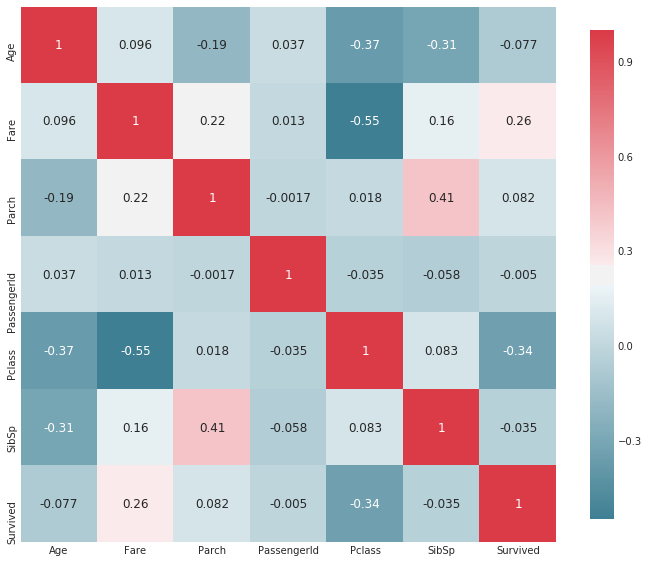

In [7]:
plot_correlation_map(titanic)

### Pairplot Visualisation

Pairplot Visualisation helps us visualize eg. linear or other relationship between features in a graphical way. The highly related features will have almost diagonal shape.

Let's create a Seaborn pairplots for the numeric features `Age`, `Fare`, `Pclass`, `Parch`, `SibSp` to visualize the relationship with `Survived`.

In [8]:
# Select the numeric features, drop NA values & scale using MinMaxScaler
numeric_features = ['Age', 'Fare', 'Pclass', 'Parch', 'SibSp', 'Survived']
titanic_numeric = titanic[numeric_features].dropna()

titanic_scaled = MinMaxScaler().fit_transform(titanic_numeric)
titanic_numeric.loc[:] = titanic_scaled

# Seaborn Pairplot 
with sns.plotting_context("notebook",font_scale=9):
    g = sns.pairplot(titanic_numeric, hue='Survived', palette='tab20', size=18)
    g.set(xticklabels=[]);

**Let's further explore the relationship between the features and survival of passengers.**

### 2.4.3 Investigating Numeric Features

### Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### 2.4.3.1 Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)


**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

##### **A) Relationship between Age and Survival.**

*Select the cell below and run it by pressing the play button.*

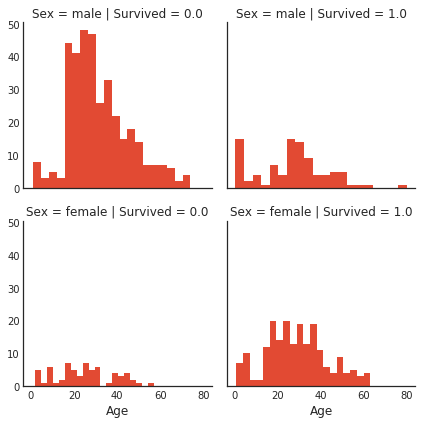

In [9]:
# Describe distributions of Age of passangers who survived or did not survive
seaborn = sns.FacetGrid(titanic, row='Sex', col='Survived')
seaborn.map(plt.hist, 'Age', bins=20)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

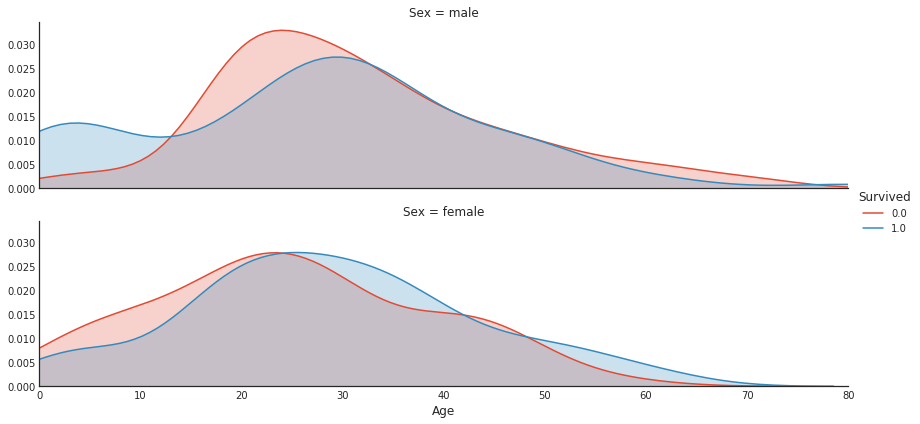

In [10]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution(titanic, var = 'Age', target = 'Survived', row = 'Sex')

Consider the graphs above, the differences in the survival distribution over age will be used as  a discriminatory feature to classify the target variable (survival in this case) by the model. If the two lines had been similar, then the age feature would not have been a good variable for our predictive model. 

Consider some key questions such as; what age does males/females have a higher or lower probability of survival? 


**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.
- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- Consider banding Fare feature.

##### **B) Relationship between fare and survival.**

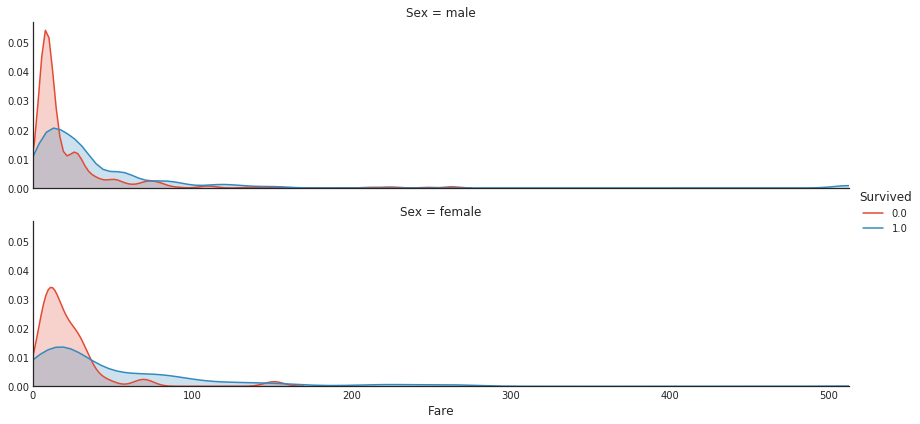

In [11]:
# Plot distributions of Fare of passangers who survived or did not survive
plot_distribution(titanic, var = 'Fare', target = 'Survived', row = 'Sex')

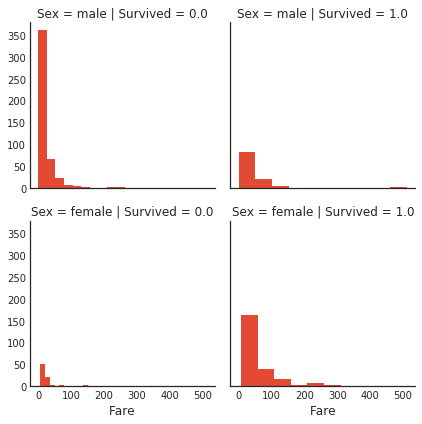

In [12]:
# Plot survival rate by Fare, Sex
seaborn = sns.FacetGrid(titanic, row='Sex', col='Survived')
seaborn.map(plt.hist, 'Fare')

### 2.4.4 Investigating categorical variables

### Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

#### 2.4.4.1 Correlating Categorical Features

Now we can correlate categorical features with our solution goal.

**Observations.**

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

##### **A) Relationship between Sex and Survival.**

In [4]:
# Describe survival rate by Sex
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

In [5]:
# Describe survival rate by Sex
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

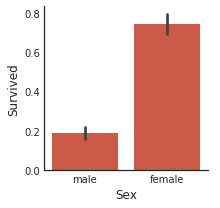

In [9]:
# Plot survival rate by Sex
plot_categories( titanic , cat = 'Sex' , target = 'Survived' )

##### **B) Relationship between Embarked and Survival.**

We can also look at categorical variables like Embarked and their relationshipwith survival.

- C = Cherbourg  
- Q = Queenstown
- S = Southampton

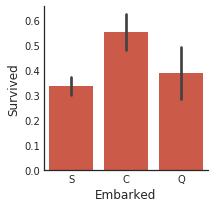

In [10]:
# Plot survival rate by Embarked
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

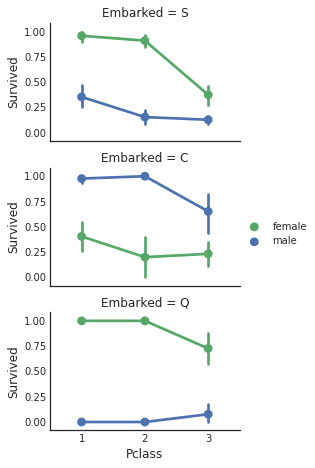

In [11]:
# Plot survival rate by Embarked, Pclass, Sex
seaborn = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
seaborn.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
seaborn.add_legend();

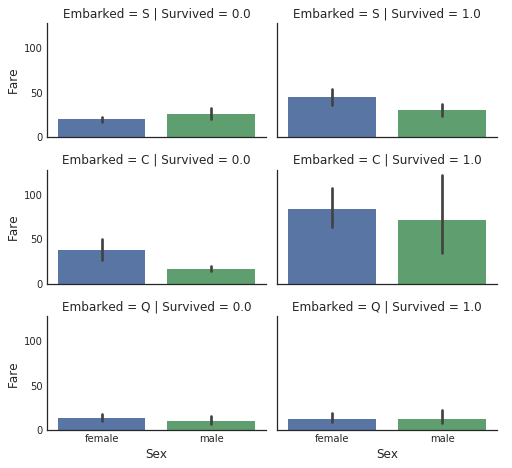

In [12]:
# Plot survival rate by Embarked, Sex & Fare
seaborn = sns.FacetGrid(titanic, row='Embarked', col='Survived', size=2.2, aspect=1.6)
seaborn.map(sns.barplot, 'Sex', 'Fare', palette='deep')
seaborn.add_legend();

#### 2.4.4.2 Correlating Numerical and Ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.
- There is high correlation between Pclass & Fare as expected.

**Decisions.**

- Consider Pclass for model training.

##### **A) Relationship between Pclass and survival.**

In [13]:
# Describe survival rate by Pclass
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

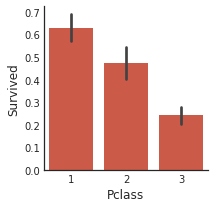

In [14]:
# Plot survival rate by Pclass
plot_categories( titanic , cat = 'Pclass' , target = 'Survived' )

In [15]:
# Describe survival rate by Pclass, Sex
titanic_pss = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(float))
titanic_pss.div(titanic_pss.sum(axis=1).astype(float), 0)

Survived            0.0       1.0
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

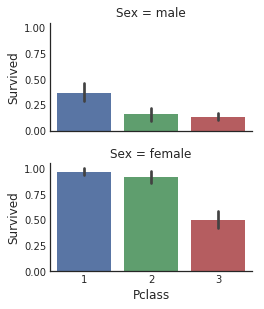

In [16]:
# Plot survival rate by Pclass, Sex
seaborn = sns.FacetGrid(titanic, row='Sex', size=2.2, aspect=1.6)
seaborn.map(sns.barplot, 'Pclass', 'Survived', palette='deep')
seaborn.add_legend();

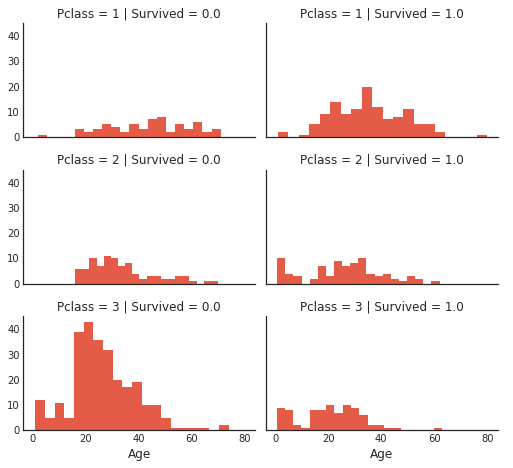

In [17]:
# Plot survival rate by Pclass, Age
seaborn = sns.FacetGrid(titanic, row='Pclass', col='Survived', size=2.2, aspect=1.6)
seaborn.map(plt.hist, 'Age', alpha=.9, bins=20)
seaborn.add_legend();

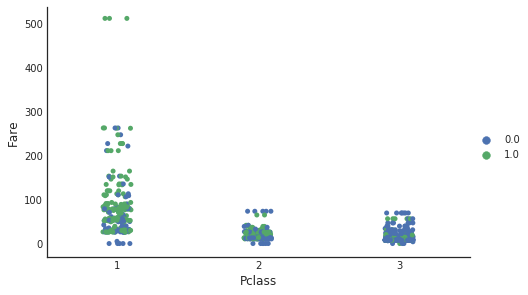

In [18]:
# Plot survival rate by Pclass & Fare
seaborn = sns.FacetGrid(titanic, size=4.2, aspect=1.6)
seaborn.map(sns.stripplot, 'Pclass', 'Fare', 'Survived', palette='deep', jitter=True)
seaborn.add_legend();

#### 2.4.4.3 Correlating Numerical and Discrete Categorical features

We may also want to correlate discrete categorical features (with non-numeric values) and numeric features. We can consider correlating SibSp, Parch with Age, Fare (numeric features) & Survived (Categorical numeric).

**Observations.**

- The aged people have more number of relatives i.e. more SibSp or Parch.
- SibSp & Parch don't correlate well with Survived as seen in the following violin plots.

**Decisions.**

- SibSp & Parch features should been used to create a new artificial family feature.

##### **A) Relationship between SibSp and survival.**

In [19]:
# Describe survival rate by SibSp
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

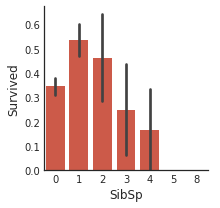

In [20]:
# Plot survival rate by SibSp
plot_categories( titanic , cat = 'SibSp' , target = 'Survived' )

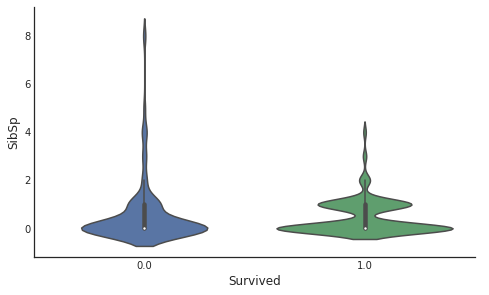

In [21]:
# Plot survival rate by SibSp
seaborn = sns.FacetGrid(titanic, size=4.2, aspect=1.6)
seaborn.map(sns.violinplot, 'Survived', 'SibSp', palette='deep', jitter=True)
seaborn.add_legend();

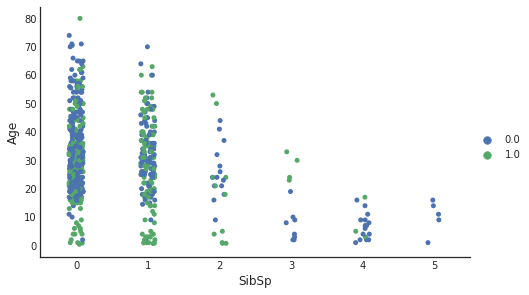

In [22]:
# Plot survival rate by SibSp & Age
seaborn = sns.FacetGrid(titanic, size=4.2, aspect=1.6)
seaborn.map(sns.stripplot, 'SibSp', 'Age', 'Survived', palette='deep', jitter=True)
seaborn.add_legend();

##### **B) Relationship between Parch and survival.**

In [23]:
# Describe survival rate by Parch
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

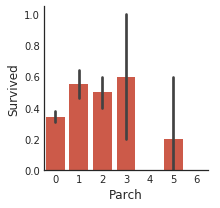

In [24]:
# Plot survival rate by Parch
plot_categories( titanic , cat = 'Parch' , target = 'Survived' )

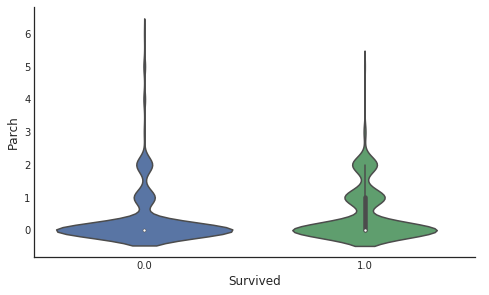

In [25]:
# Plot survival rate by Parch
seaborn = sns.FacetGrid(titanic, size=4.2, aspect=1.6)
seaborn.map(sns.violinplot, 'Survived', 'Parch', palette='deep', jitter=True)
seaborn.add_legend();

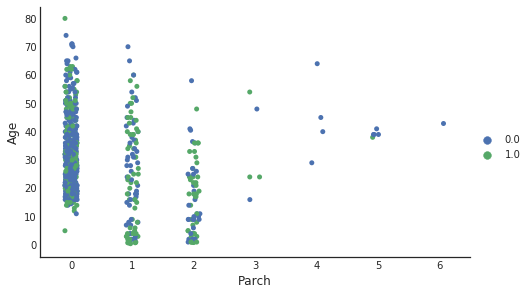

In [26]:
# Plot survival rate by Parch & Age
seaborn = sns.FacetGrid(titanic, size=4.2, aspect=1.6)
seaborn.map(sns.stripplot, 'Parch', 'Age', 'Survived', palette='deep', jitter=True)
seaborn.add_legend();

# 3. Data Preparation

## 3.1 Categorical features need to be transformed to Numeric features
The variables `Embarked`, `Pclass` and `Sex` are treated as categorical variables. Some of our model algorithms can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables.

This variable will have a value 1 if the row has a particular value and a value 0 if not. *Sex* is a dichotomy (old school gender theory) and will be encoded as one binary variable (0 or 1).

### Converting & Completing categorical features

`Feature Uno : sex`

*Select the cells below and run it by pressing the play button.*

In [4]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
sex.head()

# Transform values for further requirements
full['Sex'] = full['Sex'].map( {'male': 1, 'female': 0} ).astype(int)

`Feature Due : embarked`

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [5]:
full.Embarked.isnull().sum()

2

In [6]:
# The most common occuring port value 'S' will be used to fill NA values.
full['Embarked'] = full['Embarked'].fillna(full.Embarked.dropna().mode()[0])

In [7]:
full.Embarked.isnull().sum()

0

In [8]:
# Create new variables for every unique value of Embarked using pandas get_dummies
# titanic['Embarked'] = titanic['Embarked'].map({'S':0,'C':1,'Q':2})
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

`Feature Tre : pclass`

In [9]:
# Create new variables for every unique value of Pclass using pandas get_dummies
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1

## 3.2 Fill missing values 
Most machine learning alghorims require all variables to have values in order to use it for training the model. The simplest method is to fill missing values with the average of the variable across all observations in the training set.

### Completing a numerical continuous feature

`Feature Quattro: age`

#### Simple way of mean, mode or median

In [10]:
# Create age feature
age = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
age[ 'Age' ] = full.Age.fillna( full.Age.mean() )

age.head()

Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0

#### Another way of filling missing values

We can consider another three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

*Select the cells below and run it by pressing the play button.*

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [11]:
guessed_ages = np.zeros((2,3))
guessed_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [12]:
full.Age.isnull().sum()

263

In [13]:
# Combinations of Sex (0 or 1) and Pclass (1, 2, 3) sets
sex_class_combinations = set(product([0, 1], [1, 2, 3]))

for com in sex_class_combinations:
    age_df = full.loc[(full.Sex == com[0]) & (full.Pclass == com[1]), 'Age'].dropna()
    # guessed_ages column ranges from 0-2 while Pclass ranges from 1-3
    # Median based approach
    #guessed_ages[com[0]][com[1]-1] = age_df.median()

    # Mean based approach and then generate a random number between mean and standard deviation & round using round(x*2)/2
    guessed_ages[com[0]][com[1]-1] = np.round(np.random.uniform(age_df.mean()-age_df.std(), age_df.mean()+age_df.std()) * 2)/2
    
    # Filling with the guessed Age value based on Gender x Pclass combinations.
    full.loc[full.Age.isnull() & (full.Sex == com[0]) & (full.Pclass == com[1]), 'Age'] = guessed_ages[com[0]][com[1]-1]
    
print('Filling with the following guessed Age values based on Gender x Pclass combinations.\n', guessed_ages)

# Uncomment to update Age feature
# age[ 'Age' ] = full.Age

Filling with the following guessed Age values based on Gender x Pclass combinations.
 [[26.5 35.5 24. ]
 [50.  24.5 33. ]]


In [14]:
full.Age.isnull().sum()

0

`Feature Quattro: age_band`

#### **Age band feature**

We can distribute age into different bands to reduce number of variables representing age feature.

In [15]:
full['Age'].min()

0.17

In [16]:
full['Age'].max()

80.0

`pandas.cut` chooses the bins to be evenly spaced according to the values themselves, while `pandas.qcut` chooses the bins so that you have the same number of records in each bin.

> **Problem**: How to qcut with non unique bin edges or if the same value falls into multiple bins/quantiles?

> **Solution**: The `pandas.qcut` chooses the bins so that you have the same number of records in each bin/quantile, but the same value cannot fall in multiple bins/quantiles. You can use following workaround to resolve the above issue.

```python
# first approach
full['age_band'] = pd.qcut(full['Age'], 5, duplicates='drop')
# second approach
full['age_band'] = pd.qcut(full['Age'].rank(method='first'), 5)
```

In [17]:
# Describe age_band

full['age_band'] = pd.cut(full['Age'], 5)
full[['age_band', 'Survived']].groupby(['age_band'], as_index=False).mean().sort_values(by='age_band', ascending=True)

age_band  Survived
0  (0.0902, 16.136]  0.550000
1  (16.136, 32.102]  0.403941
2  (32.102, 48.068]  0.306338
3  (48.068, 64.034]  0.388889
4    (64.034, 80.0]  0.090909

In [18]:
def age_bondage(s): 
    if s <= 16.136:
        return 0
    elif 16.136 < s <= 32.102:
        return 1
    elif 32.102 < s <= 48.068:
        return 2
    elif 48.068 < s <= 64.034:
        return 3
    else:
        return 4

### Convert the Age feature to ordinal values based on the age_bondage method.
age_band = pd.DataFrame()

# Calculating band of a age using age_bondage
age_band[ 'age_band' ] = full[ 'Age' ].apply(age_bondage)

age_band.head()

age_band
0         1
1         2
2         1
3         2
4         2

`Feature Cinque : fare`

Similarly, we can fill the fare feature with the above methods.

In [19]:
# Create fare feature
fare = pd.DataFrame()

# Fill missing values of Fare with the average of Fare (mean)
fare[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )
# Median filling
# fill.Fare.fillna( full.Fare.dropna().median(), inplace=True)

fare.head()

Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500

## 3.3 Feature Engineering &ndash; Creating new features
CreditS: [How to score 81.34% in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)

### 3.3.1 Extract titles from passenger names
Titles reflect social status and may predict survival probability. We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we also could extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

```python
for titanic in full:
    titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
```
    
`Feature Sei : title`

*Select the cell below and run it by pressing the play button.*

In [20]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# Mapping each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )

In [21]:
# Describe survival rate by Title
titanic_tis = pd.crosstab(title[ 'Title' ], titanic[ 'Survived' ])
titanic_tis.div(titanic_tis.sum(axis=1).astype(float), 0)

Survived       0.0       1.0
Title                       
Master    0.425000  0.575000
Miss      0.298913  0.701087
Mr        0.843327  0.156673
Mrs       0.204724  0.795276
Officer   0.722222  0.277778
Royalty   0.400000  0.600000

In [22]:
# Create new variables for every unique value of Title using pandas get_dummies
title = pd.get_dummies( title.Title )
title.head()

Master  Miss  Mr  Mrs  Officer  Royalty
0       0     0   1    0        0        0
1       0     0   0    1        0        0
2       0     1   0    0        0        0
3       0     0   0    1        0        0
4       0     0   1    0        0        0

### 3.3.2 Extract Cabin category information from the Cabin number

`Feature Sette : cabin`

#### First approach: Using Pandas `get_dummies` method

*Select the cell below and run it by pressing the play button.*

In [23]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Unknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# Create new variables for every unique value of Cabin using pandas get_dummies
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0        0        0        0        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Cabin_U  
0        1  
1        0  
2        1  
3        0  
4        1

#### Second approach: Using Scikit-learn's `MultiLabelBinarizer` method

For Cabin, we also could encode the levels as digits using Scikit-learn's MultiLabelBinarizer and treat them as new features.

In [24]:
cabin_mlb = pd.DataFrame()

# replacing missing cabins with U (for Unknown)
cabin_mlb[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin_mlb[ 'Cabin' ] = cabin_mlb[ 'Cabin' ].map( lambda c : c[0] )

mlb = MultiLabelBinarizer()
cabin_mlb = mlb.fit_transform([{str(val)} for val in cabin_mlb[ 'Cabin' ].values])
cabin_mlb

# Uncomment to update cabin feature
# cabin = cabin_mlb

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [25]:
print('Cabin dimensions Before:', full['Cabin'].shape, '& After:', cabin_mlb.shape, 'encoding with MultiLabelBinarizer.')

Cabin dimensions Before: (1309,) & After: (1309, 9) encoding with MultiLabelBinarizer.


In [26]:
# Assert whether the correct encoding is done or not
assert(len(full['Cabin'].unique()) != len(mlb.classes_)), "Not Equal"

**Note about using MultiLabelBinarizer on the submission data**

While calling MultiLabelBinarizer on the submission data set, we should use already `fitted` mlb or fit on the training data again to learn the levels and then transform the submission data. 

This further ensures that only those levels that were present in the training dataset are transformed. If new levels are still found in the submission dataset then it will return an error and we need to go back and check our earlier step of replacing new levels with the placeholder value.

### 3.3.3 Extract ticket class from ticket number

`Feature Otto : ticket`

*Select the cell below and run it by pressing the play button.*

In [27]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Create new variables for every unique value of Ticket using pandas get_dummies
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

Ticket_A  Ticket_A4  Ticket_A5  Ticket_AQ3  Ticket_AQ4  Ticket_AS  \
0         0          0          1           0           0          0   
1         0          0          0           0           0          0   
2         0          0          0           0           0          0   
3         0          0          0           0           0          0   
4         0          0          0           0           0          0   

   Ticket_C  Ticket_CA  Ticket_CASOTON  Ticket_FC     ...      Ticket_SOTONO2  \
0         0          0               0          0     ...                   0   
1         0          0               0          0     ...                   0   
2         0          0               0          0     ...                   0   
3         0          0               0          0     ...                   0   
4         0          0               0          0     ...                   0   

   Ticket_SOTONOQ  Ticket_SP  Ticket_STONO  Ticket_STONO2  Ticket_STONOQ  \
0               0          0             0              0              0   
1               0          0             0              0              0   
2               0          0             0              1              0   
3               0          0             0              0              0   
4               0          0             0              0              0   

   Ticket_SWPP  Ticket_WC  Ticket_WEP  Ticket_XXX  
0            0          0           0           0  
1            0          0           0           0  
2            0          0           0           0  
3            0          0           0           1  
4            0          0           0           1  

[5 rows x 37 columns]

### 3.3.4 Create new feature combining existing features

`Feature Nove : family`

#### **family size feature**

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop *Parch* and *SibSp* from our datasets.

*Select the cell below and run it by pressing the play button.*

In [28]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

FamilySize  Family_Single  Family_Small  Family_Large
0           2              0             1             0
1           2              0             1             0
2           1              1             0             0
3           2              0             1             0
4           1              1             0             0

`Feature Dieci : age_class`

#### **age*class feature**

We can also create an artificial feature combining Pclass and Age.

In [29]:
age_class = pd.DataFrame()

# introducing a new feature : age * class
age_class[ 'age_class' ] = full[ 'Age' ] * full[ 'Pclass' ] 

age_class.head()

age_class
0       66.0
1       38.0
2       78.0
3       35.0
4      105.0

`Feature Cinque : fare_band`

#### **Fare band feature**

We can distribute fare into different bands to reduce number of variables representing fare feature.

In [30]:
full['fare_band'] = pd.qcut(full['Fare'], 4)
full[['fare_band', 'Survived']].groupby(['fare_band'], as_index=False).mean().sort_values(by='fare_band', ascending=True)

fare_band  Survived
0    (-0.001, 7.896]  0.197309
1    (7.896, 14.454]  0.303571
2   (14.454, 31.275]  0.441048
3  (31.275, 512.329]  0.600000

In [31]:
# fare_bondage method
def fare_bondage(s): 
    if s <= 7.896:
        return 0
    elif 7.896 < s <= 14.454:
        return 1
    elif 7.896 < s <= 14.454:
        return 2
    else:
        return 3

### Convert the Fare feature to ordinal values based on the fare_bondage method.
fare_band = pd.DataFrame()

# Calculating band of a age using fare_bondage
fare_band[ 'fare_band' ] = full[ 'Fare' ].apply(fare_bondage)

fare_band.head()

fare_band
0          0
1          3
2          1
3          3
4          1

## 3.4 Assemble final datasets for modelling

Split dataset by rows into test and train in order to have a holdout set to do model evaluation on. The dataset is also split by columns in a matrix (X) containing the input data and a vector (y) containing the target (or labels).

### 3.4.1 Variable selection
Select which features/variables to include in the dataset from the list below:

 - sex 
 - embarked
 - pclass
 - age
 - fare
 - title
 - cabin
 - ticket
 - family
 - age_class


*Include the variables you would like to use in the function below seperated by comma, then run the cell*

In [32]:
# Select which features/variables to include in the dataset from the list below:
# [ sex , embarked , pclass, age/age_band, fare/fare_band, title, cabin, ticket, family, age_class ]

full_X = pd.concat( [ sex , embarked , pclass, age, fare, title, family, age_class ] , axis=1 )
print(full_X.shape)
full_X.head()

(1309, 20)


Sex  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
0    1           0           0           1         0         0         1   
1    0           1           0           0         1         0         0   
2    0           0           0           1         0         0         1   
3    0           0           0           1         1         0         0   
4    1           0           0           1         0         0         1   

    Age     Fare  Master  Miss  Mr  Mrs  Officer  Royalty  FamilySize  \
0  22.0   7.2500       0     0   1    0        0        0           2   
1  38.0  71.2833       0     0   0    1        0        0           2   
2  26.0   7.9250       0     1   0    0        0        0           1   
3  35.0  53.1000       0     0   0    1        0        0           2   
4  35.0   8.0500       0     0   1    0        0        0           1   

   Family_Single  Family_Small  Family_Large  age_class  
0              0             1             0       66.0  
1              0             1             0       38.0  
2              1             0             0       78.0  
3              0             1             0       35.0  
4              1             0             0      105.0

### 3.4.2 Create datasets
Below we will seperate the data into training and test datasets.

*Select the cell below and run it by pressing the play button.*

In [33]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X[ 891: ]

train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print ('full:', full_X.shape , 'train_X:', train_X.shape , 'train_y:', train_y.shape , 'valid_X:', valid_X.shape , 'valid_y:', valid_y.shape , 'test_X:', test_X.shape)

full: (1309, 20) train_X: (623, 20) train_y: (623,) valid_X: (268, 20) valid_y: (268,) test_X: (418, 20)


In [34]:
train_X.head()

Sex  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
401    1           0           0           1         0         0         1   
646    1           0           0           1         0         0         1   
472    0           0           0           1         0         1         0   
557    1           1           0           0         1         0         0   
464    1           0           0           1         0         0         1   

           Age      Fare  Master  Miss  Mr  Mrs  Officer  Royalty  FamilySize  \
401  26.000000    8.0500       0     0   1    0        0        0           1   
646  19.000000    7.8958       0     0   1    0        0        0           1   
472  33.000000   27.7500       0     0   0    1        0        0           4   
557  29.881138  227.5250       0     0   1    0        0        0           1   
464  29.881138    8.0500       0     0   1    0        0        0           1   

     Family_Single  Family_Small  Family_Large  age_class  
401              1             0             0       78.0  
646              1             0             0       57.0  
472              0             1             0       66.0  
557              1             0             0       50.0  
464              1             0             0       99.0

## 3.5 Feature Importance

Selecting the optimal features in the model is very important. Now we will try to evaluate what are the most important features for the model to make the prediction and find the best performing model based on them. Being an iterative process, we will come back again to select (or reduce the number of) the most important features for further refining the best performing model. 

*Select the cell below and run it by pressing the play button.*

0.9775280898876404


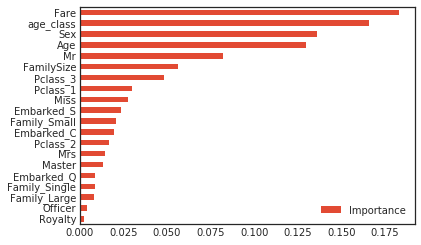

In [35]:
# plot_variable_importance based on Random Forest Classifier
model = RandomForestClassifier()
plot_variable_importance(model, train_X, train_y)

0.9871589085072231


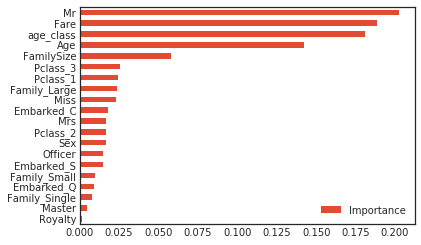

In [36]:
# plot_variable_importance based on Random Forest Classifier
train_X_mmscaled = train_X.copy()
train_X_mmscaled.loc[:] = MinMaxScaler().fit_transform(train_X_mmscaled)

model = RandomForestClassifier()
plot_variable_importance(model, train_X_mmscaled, train_y)

In [37]:
train_X.head()

Sex  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
401    1           0           0           1         0         0         1   
646    1           0           0           1         0         0         1   
472    0           0           0           1         0         1         0   
557    1           1           0           0         1         0         0   
464    1           0           0           1         0         0         1   

           Age      Fare  Master  Miss  Mr  Mrs  Officer  Royalty  FamilySize  \
401  26.000000    8.0500       0     0   1    0        0        0           1   
646  19.000000    7.8958       0     0   1    0        0        0           1   
472  33.000000   27.7500       0     0   0    1        0        0           4   
557  29.881138  227.5250       0     0   1    0        0        0           1   
464  29.881138    8.0500       0     0   1    0        0        0           1   

     Family_Single  Family_Small  Family_Large  age_class  
401              1             0             0       78.0  
646              1             0             0       57.0  
472              0             1             0       66.0  
557              1             0             0       50.0  
464              1             0             0       99.0

#### Helper functions for Ranking features, REFCV & Plotting

In [382]:
# Plot different parameter's space distribution after sampling for n_samples
def plotly_feature_importance(all_feature_df, col=2, top_n_features=20):
    
    model_names = all_feature_df.columns
    # Generate figure, axes
    fig, axes = plt.subplots(nrows=len(model_names), ncols=col, figsize=(16, 30))
    cmap = plt.cm.jet

    # Iterating over different trials & parameters
    for index, model_name in enumerate(model_names):
        
        # Plot top n important features
        data = all_feature_df.drop('rfe_grid_scores').sort_values(by=model_name, ascending=False)[0:top_n_features]
        sns.barplot(x=model_name, y=data.index, ax=axes[index, 0], data=data)
        axes[index, 0].set_xlim(0.5, 1.05)
        axes[index, 0].set_xlabel('Feature Importance score')
        axes[index, 0].set_title('Feature Importance for {}'.format(model_name))
        
        # Plot Grid scores
        grid_score = all_feature_df.loc['rfe_grid_scores', model_name]
        axes[index, 1].plot(range(1 , len(grid_score) + 1), grid_score, label='{} Grid Score'.format(model_name))
        axes[index, 1].set_xlabel('Number of Features selected')
        axes[index, 1].set_ylabel("Cross validation score")
        axes[index, 1].legend(loc='best')
        
#     axes[len(model_names)-1, 0].set_xlabel('Number of Features selected')
#     axes[len(model_names)-1, 1].set_xlabel('Feature Importance score')

    plt.show()

In [383]:
# Create a function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [384]:
# Define dictionary to store our rankings
ranks = {}

### 3.5.1 Stability Selection

Stability selection is a relatively novel method for feature selection, based on subsampling in combination with selection algorithms (which could be regression, SVMs or other similar method).

The high level idea is to apply a feature selection algorithm on different subsets of data and with different subsets of features. After repeating the process a number of times, the selection results can be aggregated, for example by checking how many times a feature ended up being selected as important when it was in an inspected feature subset. 

We can expect strong features to have scores close to 100%, since they are always selected when possible. Weaker, but still relevant features will also have non-zero scores, since they would be selected when stronger features are not present in the currently selected subset, while irrelevant features would have scores (close to) zero, since they would never be among selected features.

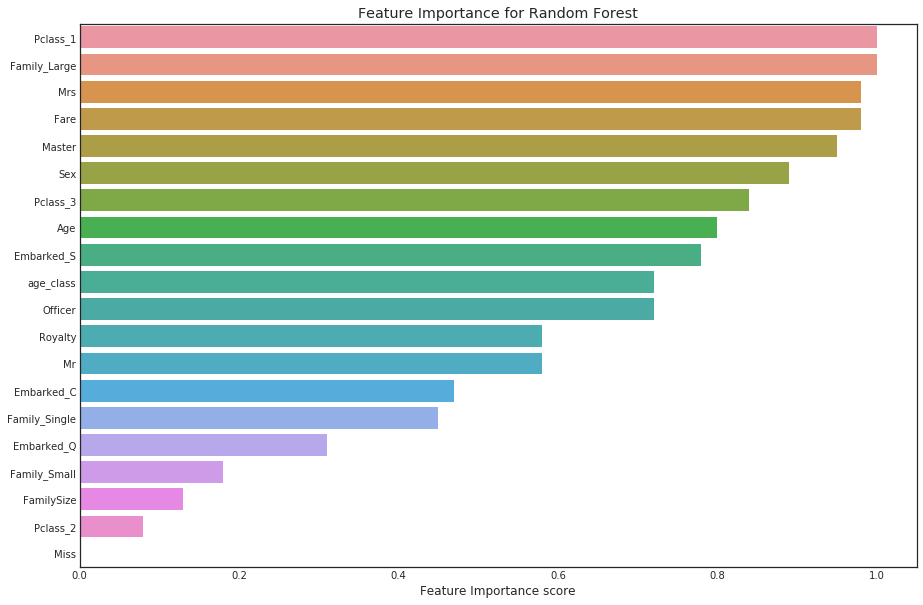

In [385]:
# Stability selection method with Randomized Lasso
rlasso = RandomizedLasso()
rlasso.fit(train_valid_X, train_valid_y)

key = 'rlasso'
ranks[key] = ranking(np.abs(rlasso.scores_), train_valid_X.columns)

# Dataframe containing feature importance & score
feature_rlasso = pd.DataFrame.from_dict(ranks[key], orient='index')
feature_rlasso = feature_rlasso.rename(columns={0: key})

top_n_features = 20
feature_rlasso = feature_rlasso.sort_values(by=key, ascending=False)[0:top_n_features]

fig = plt.figure(figsize=(15, 10))

sns.barplot(x=key, y=feature_rlasso.index, data=feature_rlasso)
plt.xlabel( "Feature Importance score" )
plt.title('Feature Importance for Random Forest')

plt.show()

The randomized lasso implementation can choose a good $alpha$ parameter automatically. The scores drop smoothly rather than decreasing sharply as often in the case of pure lasso or random forest. 

This means `stability selection` is useful for both `pure feature selection` to `reduce overfitting` and data interpretation. In general, good features won’t get `0 coefficients` even though similar, correlated features are present in the dataset (as in case of lasso).

### 3.5.2 Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests.

In [223]:
%%time

# Feature importance using SelectKBest with different scoring functions chi2, f_classif or mutual_info_classif 
kbest = SelectKBest(chi2, k=20)
train_X_kbest = kbest.fit_transform(train_valid_X, train_valid_y)

# Masking the features with k best support boolean values
kbest_features = list(compress(train_valid_X.columns.values, kbest.get_support()))

print('\nK Best Features')
print(kbest_features)


K Best Features
['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'Fare', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty', 'FamilySize', 'Family_Single', 'Family_Small', 'Family_Large', 'age_class']
CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.14 ms


The different `scoring functions` (`chi2`, `f_classif` & `mutual_info_classif`) selected kind of the `same k best features`.

##### Training again on the k best features

In [224]:
# Best parameters discovered after optmization in the below sections
params = {'alpha': 7.0, 'colsample_bytree': 0.75, 'n_estimators': 366, 'lambda': 1.3, 'eta': 0.25, 'min_child_weight': 5.0, 'max_depth': 13, 'gamma': 0.5, 'subsample': 0.7000000000000001}

# XGB Classifier
clf = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
clf.fit(train_X[kbest_features], train_y)

XGBClassifier(alpha=7.0, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.75, eta=0.25, gamma=0.5,
       lambda=1.3, learning_rate=0.1, max_delta_step=0, max_depth=13,
       min_child_weight=5.0, missing=None, n_estimators=366, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=21,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=21, silent=True,
       subsample=0.7000000000000001)

In [225]:
accuracy_score(valid_y, clf.predict(valid_X[kbest_features]))

0.8059701492537313

The model trained with `SelectKBest` k best features, has `Accuracy`: `80.59%`

### 3.5.3  Feature Selection using SelectFromModel

SelectFromModel is a meta-transformer that can be used along with any estimator that has a `coef_` or `feature_importances_` attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. 

Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are `mean`, `median` and float multiples of these like `0.1*mean`.

It can be classified into methods.
- L1-based feature selection
- Tree-based feature selection

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [208]:
# XGB Classifier
clf = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
clf.fit(train_X, train_y)

selectfm = SelectFromModel(clf, threshold='median', prefit=True)
X_new = selectfm.transform(train_X)

# Masking the features from SelectFromModel with best support boolean values
features_selectfm = list(compress(train_valid_X.columns.values, selectfm.get_support()))

print('\nSelectFromModel Best Features')
print(features_selectfm)


SelectFromModel Best Features
['Sex', 'Embarked_C', 'Embarked_S', 'Pclass_3', 'Age', 'Fare', 'Mr', 'FamilySize', 'Family_Small', 'age_class']


##### Training again on the SelectFromModel best features

In [209]:
# XGB Classifier
clf = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
clf.fit(train_X[features_selectfm], train_y)

XGBClassifier(alpha=7.0, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.75, eta=0.25, gamma=0.5,
       lambda=1.3, learning_rate=0.1, max_delta_step=0, max_depth=13,
       min_child_weight=5.0, missing=None, n_estimators=366, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=21,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=21, silent=True,
       subsample=0.7000000000000001)

In [210]:
accuracy_score(valid_y, clf.predict(valid_X[features_selectfm]))

0.8097014925373134

The model trained with `SelectFromModel` tree based method, has `Accuracy`: `80.97%`

### Pairplot Visualization

Let's create a Seaborn pairplots for the important features `Sex`, `Embarked_S`, `Pclass_3`, `Age`, `Fare`, `Miss`, `Mr`, `FamilySize`, `Family_Small`, `age_class` to visualize the relationship with `Survived`.

In [371]:
# Select the best features from SelectFromModel feature selection & scale using MinMaxScaler
train_valid_selectfm = pd.concat([train_valid_X[features_selectfm], train_valid_y], axis=1)
train_valid_scaled = MinMaxScaler().fit_transform(train_valid_selectfm)
train_valid_selectfm.loc[:] = train_valid_scaled

# Seaborn Pairplot 
with sns.plotting_context("notebook",font_scale=9):
    g = sns.pairplot(train_valid_selectfm, hue='Survived', palette='tab20', size=18)
    g.set(xticklabels=[]);

### 3.5.4 Automagic **Recursive feature elimination**

Recursive feature elimination is based on the idea to repeatedly construct a model (for example an SVM or a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features.

The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration. Just as non-regularized regression can be unstable, so can RFE when utilizing it, while using ridge regression can provide more stable results.

It's also possible to automatically select the optimal number of features using `Recursive Feature Elimination Cross Validation` and visualize it.

Let's compare the feature's importance results from the following methods.

1. LogisticRegression Coefficients Importance
2. Random Forest feature ranking
3. Recursive Feature Elimination using XGB, Gradient Boost & Random Forest model

#### 3.5.4.1 LogisticRegression Coefficients Importance

Let's find feature importance using basic Logistic Regression. Sklearn's Logistic Regression model comes with it's own inbuilt coefficients which calculates the feature importance and one can conveniently just call it via `coef_`.

*Select the cell below and run it by pressing the play button.*

Train score: 81.06 Valid score: 86.94

Feature ranking


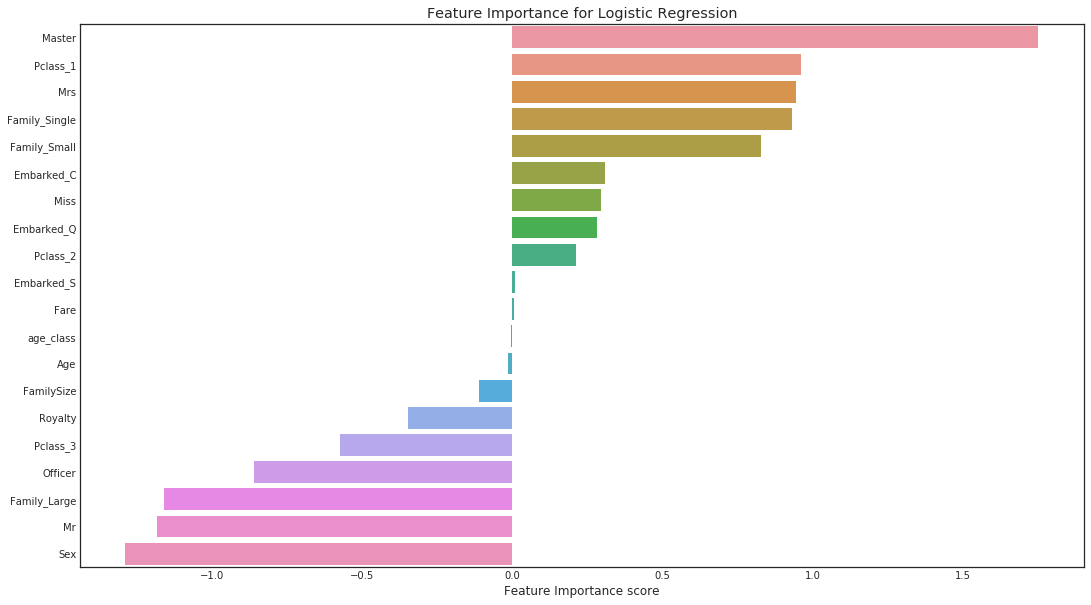

CPU times: user 397 ms, sys: 641 ms, total: 1.04 s
Wall time: 241 ms


In [389]:
%%time
# plot_model_var_imp(model, train_X, train_y) defined above does the same as following.
# Feature importance using Logistic Regression model
log_reggae = LogisticRegression()
log_reggae.fit(train_valid_X , train_valid_y )

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

print('Train score:', np.round(log_reggae.score(train_X , train_y)*100, 2), 'Valid score:', np.round(log_reggae.score(valid_X , valid_y)*100, 2))

key = 'Log Reggae' 
# Calculating feature importance
log_reggae_coef_dict = {}
for coef, feat in zip(log_reggae.coef_.flatten(), train_valid_X.columns.values):
    log_reggae_coef_dict[feat] = coef
    

print('\nFeature ranking')

# Dataframe containing feature importance & score
feature_log_reggae = pd.DataFrame.from_dict(log_reggae_coef_dict, orient='index')
feature_log_reggae = feature_log_reggae.rename(columns={0: key})

top_n_features = 20
feature_log_reggae = feature_log_reggae.sort_values(by=key, ascending=False)[0:top_n_features]
sns.barplot(x=key, y=feature_log_reggae.index, ax=axes, data=feature_log_reggae)
axes.set_xlabel( "Feature Importance score" )
axes.set_title('Feature Importance for Logistic Regression')

plt.show()

#### 3.5.4.2 Random Forest feature importance

Sklearn's Random Forest model also comes with it's own inbuilt feature ranking attribute and one can conveniently just call it via `feature_importances_`.

*Select the cell below and run it by pressing the play button.*

Train score: 98.23 Valid score: 98.88
Optimal number of features for Random Forest: 20


Feature ranking


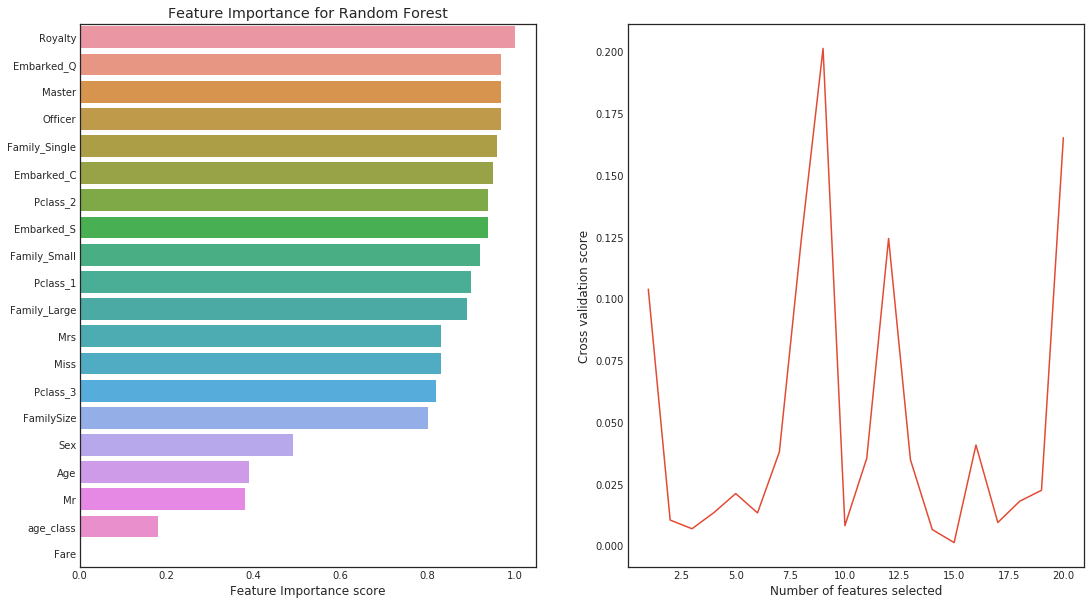

CPU times: user 1.45 s, sys: 548 ms, total: 1.99 s
Wall time: 1.32 s


In [425]:
%%time
# plot_model_var_imp(model, train_X, train_y) defined above does the same as following.
# Feature importance using Random Forest model
rf = RandomForestClassifier(n_jobs=-1, n_estimators=300)
rf.fit(train_valid_X , train_valid_y )

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

print('Train score:', np.round(rf.score(train_X , train_y)*100, 2), 'Valid score:', np.round(rf.score(valid_X , valid_y)*100, 2))
print('Optimal number of features for Random Forest: {}\n'.format(rf.n_features_))

key = 'Random Forest Pure' 
# Calculating feature importance
ranks[key] = ranking(rf.feature_importances_, train_valid_X.columns.values, order=-1)
print('\nFeature ranking')

# Dataframe containing feature importance & score
feature_rf_imp = pd.DataFrame.from_dict(ranks[key], orient='index')
feature_rf_imp = feature_rf_imp.rename(columns={0: key})

top_n_features = 20
feature_rf_imp = feature_rf_imp.sort_values(by=key, ascending=False)[0:top_n_features]
sns.barplot(x=key, y=feature_rf_imp.index, ax=axes[0], data=feature_rf_imp)
axes[0].set_xlabel( "Feature Importance score" )
axes[0].set_title('Feature Importance for Random Forest')

# Plot number of features VS. cross-validation scores
axes[1].plot( range( 1 , len( rf.feature_importances_ ) + 1 ) , rf.feature_importances_ )
axes[1].set_xlabel( "Number of features selected" )
axes[1].set_ylabel( "Cross validation score" )

plt.show()

#### 3.5.4.3 Recursive Feature Elimination using XGB, Gradient Boost & Random Forest model

Now we will eliminate feature recursively and cross validate it using `RFECV`. RFECV can take different estimator for finding important features. We will be using `XGB, Gradient Boost & Random Forest` estimator for the task.

In [426]:
# Recursive Feature Elimination
def feature_importance(model_name, clf, cvfold=5, columns=train_valid_X.columns.values, verbose=0, scoring='accuracy', cores=-1):
    
    # Recursive Feature Elimination using XGB model
    rfecv = RFECV( estimator = clf , step = 1 , cv=cvfold , verbose=verbose, scoring = scoring, n_jobs=cores )
    rfecv.fit( train_valid_X, train_valid_y )

    print('Train score:', np.round(rfecv.score(train_X , train_y)*100, 2), 'Valid score:', np.round(rfecv.score(valid_X , valid_y)*100, 2))
    print('Optimal number of features for {}: {}\n'.format(model_name, rfecv.n_features_))

    # Ranking feature importance
    ranks[model_name] = ranking(list(map(float, rfecv.ranking_)), list(columns), order=-1)

    # Dataframe containing feature importance & score
    feature_df = pd.DataFrame.from_dict(ranks[model_name], orient='index')
    feature_df.loc['rfe_grid_scores'] = [rfecv.grid_scores_]
    #feature_df.append(pd.Series(rfecv.grid_scores_, index=feature_df.columns), name='rfe_grid_scores') 
    feature_df = feature_df.rename(columns={0: model_name})
    
    return feature_df

In [427]:
# Classifier names & initializations
names = ["Random Forest", "Gradient Boost", "XGB Classifier"]

classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()]

In [428]:
%%time

# Calculating feature importance for different models & saving the results in a dataframe
all_feature_df = pd.DataFrame()

for model_name, clf in zip(names, classifiers):
    feature_df = feature_importance(model_name, clf, cvfold=5, columns=train_valid_X.columns.values, verbose=0, scoring='accuracy', cores=-1)
    all_feature_df = pd.concat([all_feature_df, feature_df], axis=1)

Train score: 96.31 Valid score: 97.39
Optimal number of features for Random Forest: 11

Train score: 90.05 Valid score: 91.79
Optimal number of features for Gradient Boost: 13

Train score: 87.16 Valid score: 89.55
Optimal number of features for XGB Classifier: 11

CPU times: user 1.72 s, sys: 728 ms, total: 2.45 s
Wall time: 5.79 s


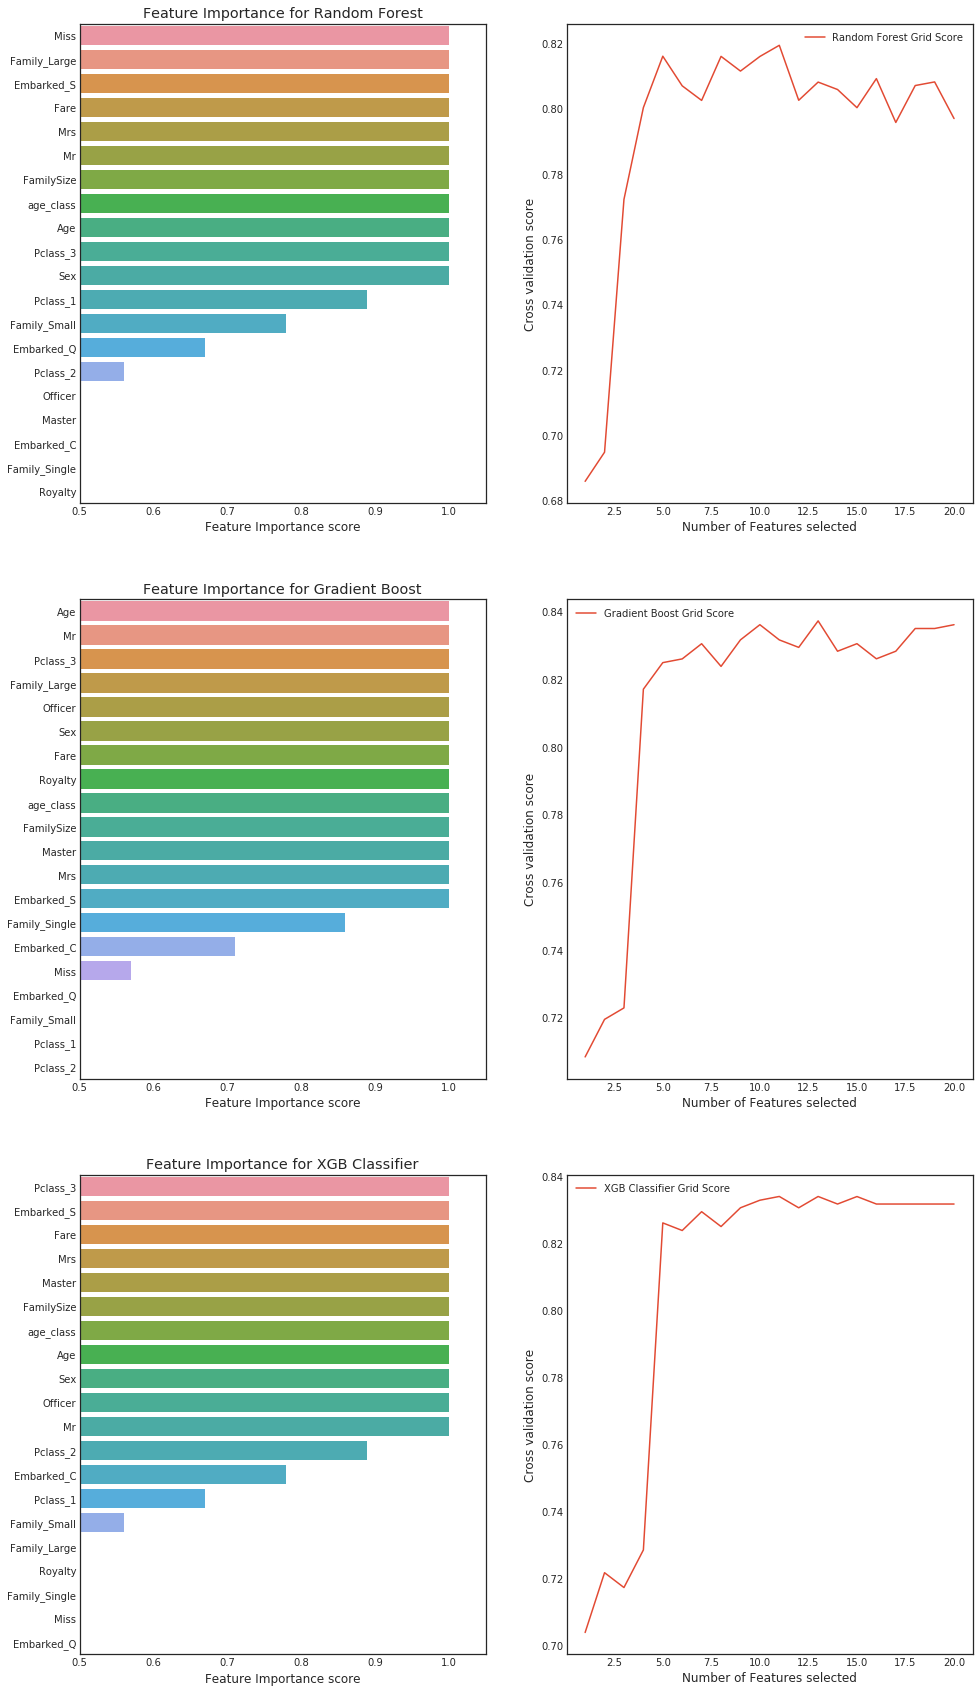

In [429]:
plotly_feature_importance(all_feature_df)

### 3.5.5 Creating the Feature Ranking Matrix

We can combine the scores from the above methods (Feature importance matrix from combinations of `Log_Reggae`, `Random Forest` & `RFECV` using `XGB, Gradient Boost & Random Forest`) and output it in a matrix form for convenient viewing.

In [430]:
# all_feature_imp = pd.concat([all_feature_df.drop('rfe_grid_scores'), feature_rf_imp, feature_log_reggae], axis = 1)
# all_feature_imp = pd.concat([feature_rf_imp, feature_log_reggae], axis = 1)
# all_feature_imp = pd.concat([all_feature_df.drop('rfe_grid_scores'), feature_log_reggae], axis = 1)
# all_feature_imp = all_feature_df.drop('rfe_grid_scores')
all_feature_imp = all_feature_df.drop('Random Forest', axis=1).drop('rfe_grid_scores')

# Calculate average feature importance from above three variations
all_feature_imp['avg_score'] = all_feature_imp.mean(axis=1)

sorted_all_feature_imp = all_feature_imp.sort_values(by='avg_score', ascending=False)
sorted_n_feature_imp = sorted_all_feature_imp[0:20]
display(sorted_n_feature_imp)

Gradient Boost XGB Classifier  avg_score
Age                        1              1      1.000
Embarked_S                 1              1      1.000
Fare                       1              1      1.000
Mrs                        1              1      1.000
Master                     1              1      1.000
FamilySize                 1              1      1.000
age_class                  1              1      1.000
Mr                         1              1      1.000
Pclass_3                   1              1      1.000
Sex                        1              1      1.000
Officer                    1              1      1.000
Embarked_C              0.71           0.78      0.745
Family_Large               1           0.44      0.720
Royalty                    1           0.33      0.665
Family_Single           0.86           0.22      0.540
Pclass_2                   0           0.89      0.445
Family_Small            0.29           0.56      0.425
Pclass_1                0.14           0.67      0.405
Miss                    0.57           0.11      0.340
Embarked_Q              0.43              0      0.215

Feature importance matrix from `RFECV` using `XGB, Gradient Boost` model

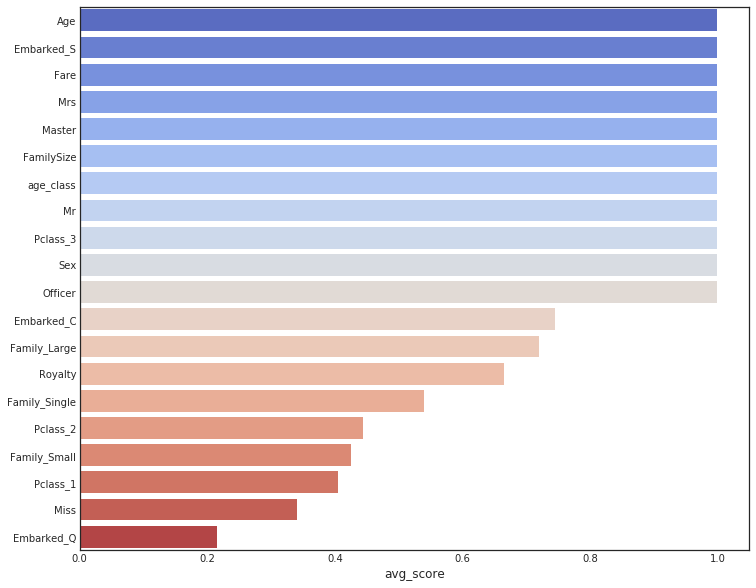

In [431]:
# Let's plot the ranking of the feature matrix
plt.figure(figsize=(12, 10))
sns.barplot(x='avg_score', y=sorted_n_feature_imp.index, data=sorted_n_feature_imp, palette='coolwarm')

Feature importance matrix from `RFECV` using `XGB, Gradient Boost & Random Forest` model

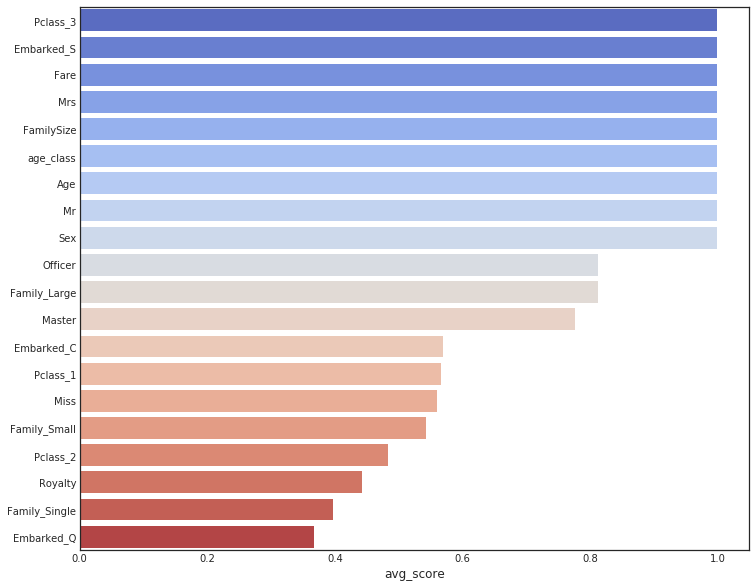

In [434]:
# Let's plot the ranking of the feature matrix
plt.figure(figsize=(12, 10))
sns.barplot(x='avg_score', y=sorted_n_feature_imp.index, data=sorted_n_feature_imp, palette='coolwarm')

Feature importance matrix from `Log_Reggae` & `RFECV` using `XGB, Gradient Boost & Random Forest` model

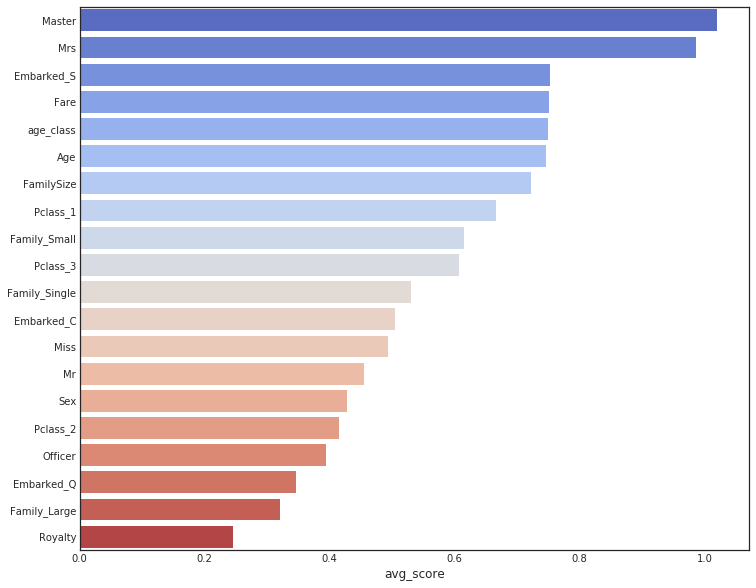

In [437]:
# Let's plot the ranking of the feature matrix
plt.figure(figsize=(12, 10))
sns.barplot(x='avg_score', y=sorted_n_feature_imp.index, data=sorted_n_feature_imp, palette='coolwarm')

Feature importance matrix from `Log_Reggae`, `Random Forest` model

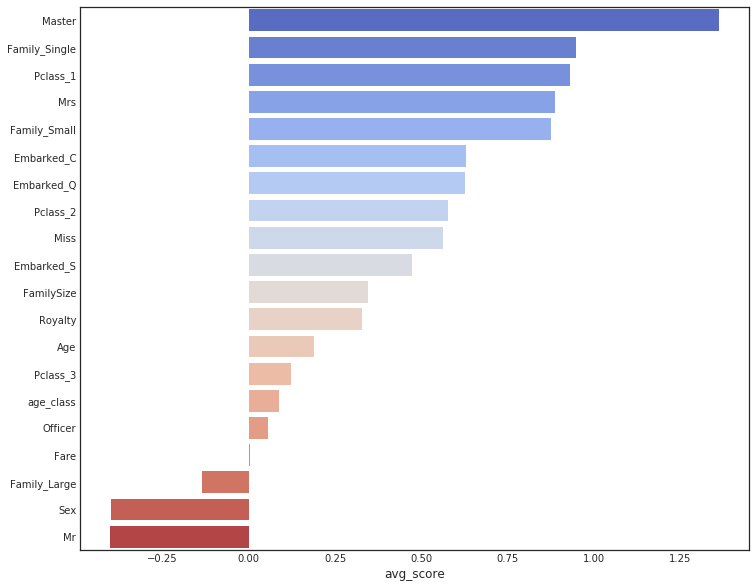

In [441]:
# Let's plot the ranking of the feature matrix
plt.figure(figsize=(12, 10))
sns.barplot(x='avg_score', y=sorted_n_feature_imp.index, data=sorted_n_feature_imp, palette='coolwarm')

Feature importance matrix from `Log_Reggae`, `Random Forest` & `RFECV` using `XGB, Gradient Boost & Random Forest` model

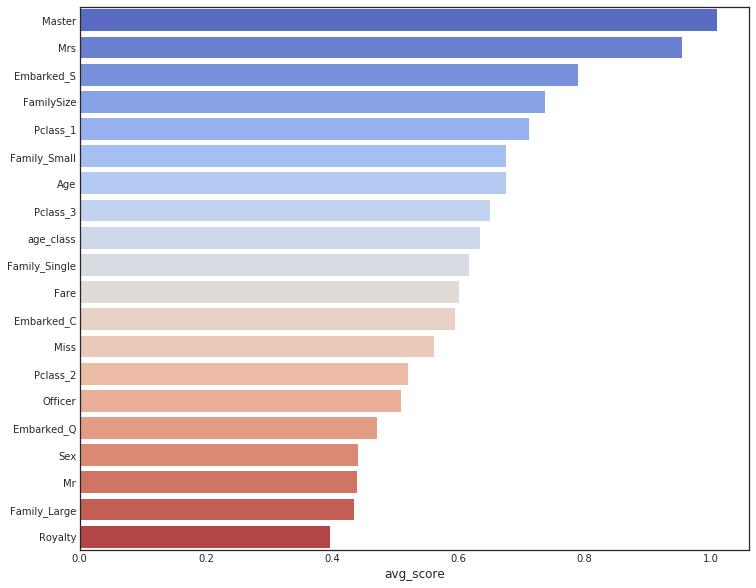

In [444]:
# Let's plot the ranking of the feature matrix
plt.figure(figsize=(12, 10))
sns.barplot(x='avg_score', y=sorted_n_feature_imp.index, data=sorted_n_feature_imp, palette='coolwarm')

# 4. Modeling

Now we are ready to train a model and predict. There are loads of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirements to narrow down to a select few baseline models which we can evaluate iteratively. 

Our problem falls in the supervised classification category. We want to identify the relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). 

With above two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few which are as follow:

- Logistic Regression
- KNeighborsClassifier
- SVC
- GaussianProcessClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- MLPClassifier
- AdaBoostClassifier
- GradientBoostingClassifier
- GaussianNB
- LinearDiscriminantAnalysis
- QuadraticDiscriminantAnalysis
- XGBClassifier

## 4.1 Model Selection

Then there are several options to choose from when it comes to models. 

A good starting point is `Logisic Regression`. 

In [445]:
# Baseline Logistic Regression model
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

predictions = logreg.predict(valid_X)
accuracy = accuracy_score(valid_y, predictions)
acc_log = np.round(accuracy * 100, 2)
acc_log

85.82

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

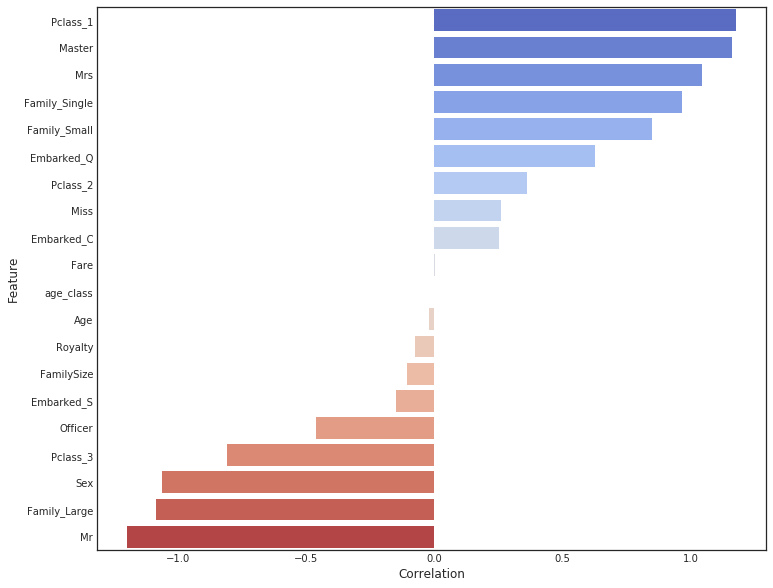

In [451]:
# Let's check out the important features 
coeff_df = pd.DataFrame(train_X.columns)

coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

sorted_n_feature_imp = coeff_df.sort_values(by='Correlation', ascending=False)[0:20]

# Let's plot the coefficients 
plt.figure(figsize=(12, 10))
sns.barplot(x='Correlation', y=sorted_n_feature_imp.Feature, data=sorted_n_feature_imp, palette='coolwarm')

After selecting dataset containing the important features, you can run a general Classifier Comparison module containing sklearn classifers with vanilla configurations.

### Classifier Comparison

In [484]:
%%time

# Classifier names & initializations
names = ["Nearest Neighbors", "SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "GradientBoost"
         "Naive Bayes", "LDA", "QDA", "XGB Classifier", "Voting Classifier"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
    VotingClassifier(estimators=[('xgb', XGBClassifier()), 
                                 ('rf', RandomForestClassifier()), 
                                 ('gb', GradientBoostingClassifier()),
                                 ('lda', LinearDiscriminantAnalysis())], 
                     voting='hard')]

# Split & shuffle data using Stratified K Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

# Calculate accuracy over all splits, classifiers
count = 0
acc_dict = defaultdict(list)
for train_index, test_index in kfold.split(train_X, train_y):
    xtrain, ytrain = train_X.iloc[train_index], train_y.iloc[train_index] 
    xtest, ytest = train_X.iloc[test_index], train_y.iloc[test_index] 
    print('Iteration: ', count)
    
    # iterate over classifiers
    for clf in classifiers:
        clf_name = clf.__class__.__name__
        clf.fit(xtrain, ytrain)
        predictions = clf.predict(xtest)
        accuracy = accuracy_score(ytest, predictions)
        
        # Append results in default dict of lists
        acc_dict[clf_name].append(accuracy)

    count += 1

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
CPU times: user 13.2 s, sys: 8.43 s, total: 21.6 s
Wall time: 3.6 s


In [485]:
# Dataframe containing classifier name & accuracy score
acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
acc_df = acc_df.rename(columns={0: '1st Iteration', 1: '2nd Iteration', 2: '3rd Iteration', 3: '4th Iteration', 4: '5th Iteration'})

# Calculate average accuracy
acc_df['avg_acc'] = acc_df.mean(axis=1)
acc_df = (acc_df*100).round(2)

sorted_acc_df = acc_df.sort_values(by='avg_acc', ascending=False)
display(sorted_acc_df)

1st Iteration  2nd Iteration  3rd Iteration  \
XGBClassifier                           84.0           80.0           80.0   
VotingClassifier                        83.2           80.8           79.2   
LinearDiscriminantAnalysis              82.4           80.0           77.6   
GradientBoostingClassifier              83.2           80.0           79.2   
RandomForestClassifier                  80.8           80.0           74.4   
AdaBoostClassifier                      82.4           76.0           74.4   
GaussianNB                              81.6           74.4           76.0   
DecisionTreeClassifier                  76.0           69.6           74.4   
MLPClassifier                           86.4           64.0           68.0   
KNeighborsClassifier                    72.0           66.4           69.6   
GaussianProcessClassifier               72.8           64.8           67.2   
SVC                                     69.6           64.0           68.8   
QuadraticDiscriminantAnalysis           63.2           52.8           66.4   

                               4th Iteration  5th Iteration  avg_acc  
XGBClassifier                          80.65          84.68    81.86  
VotingClassifier                       82.26          83.06    81.70  
LinearDiscriminantAnalysis             82.26          83.06    81.06  
GradientBoostingClassifier             79.84          81.45    80.74  
RandomForestClassifier                 81.45          84.68    80.27  
AdaBoostClassifier                     80.65          81.45    78.98  
GaussianNB                             81.45          79.84    78.66  
DecisionTreeClassifier                 78.23          83.06    76.26  
MLPClassifier                          79.03          79.03    75.29  
KNeighborsClassifier                   70.97          72.58    70.31  
GaussianProcessClassifier              68.55          78.23    70.31  
SVC                                    67.74          70.97    68.22  
QuadraticDiscriminantAnalysis          41.94          38.71    52.61

Text(0.5,1,'Classifier Comparison based on Accuracy')

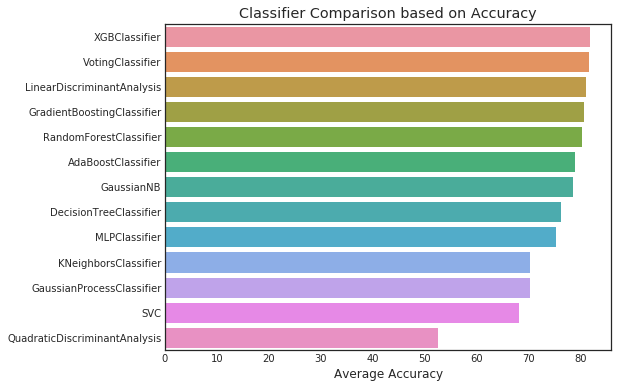

In [486]:
# Plot Classifier Comparison based on Accuracy
sns.barplot(x='avg_acc', y=sorted_acc_df.index, data=sorted_acc_df)
plt.xlabel('Average Accuracy')
plt.title('Classifier Comparison based on Accuracy')

## 4.2 Auto-ML


It's now time to `unleash the kraken` **Auto-ML**. It will get its hands more dirtier and deep dive into the unknown realms to `find the best parameters` using `exhaustive optimizations` and `parameter space searches`. 

It seems like there would be boom in the field of auto-ml in coming years to reduce the repetitive tasks of optimization and human bias. 

I will be using the following two auto-mls for our taks. 

1. Auto-Sklearn
2. TPOT

### 4.2.1 Auto-Sklearn

Auto-Sklearn frees a machine learning user from algorithm selection and hyperparameter tuning. 
It leverages recent advantages in `Bayesian optimization`, `meta-learning` and `ensemble construction`.

In [41]:
# Running the autosklearn pipeline
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(train_X, train_y)

[WARNING] [2018-09-01 20:23:21,684:EnsembleBuilder(1):c5f1519824b6b1a6bce5d6e18bf2b807] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-01 20:23:21,690:EnsembleBuilder(1):c5f1519824b6b1a6bce5d6e18bf2b807] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-01 20:32:42,152:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-09-01 20:32:42,152:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


AutoSklearnClassifier(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_nbest=50,
           ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25,
           ml_memory_limit=3072, output_folder=None,
           per_run_time_limit=360, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=3600,
           tmp_folder=None)

#### Saving the best ensemble of the models & it's configuration discovered through auto-sklearn

In [46]:
best_ensembles = automl.show_models()
print('The best models discovered through Auto-Sklearn is as follows.\n')
pprint.pprint(best_ensembles)

best_ensembles_dict = {'best_ensembles': best_ensembles}
print('Saving the best ensemble of the models configuration discovered through auto-sklearn.')
# Dumping ensemble configurations
joblib.dump(best_ensembles_dict, os.path.join('./checkpoint/auto-sklearn', 'best_ensembles_dict.pickle'))

print('Saving the best ensemble of the models discovered through auto-sklearn.')
# Dumping ensemble of the models
with open(os.path.join('./checkpoint/auto-sklearn', 'auto-sklearn.pickle'), 'wb') as file:
    pickle.dump(automl, file, protocol=pickle.HIGHEST_PROTOCOL)

The best models discovered through Auto-Sklearn is as follows.

("[(0.260000, SimpleClassificationPipeline({'rescaling:__choice__': 'none', "
 "'preprocessor:random_trees_embedding:bootstrap': 'True', "
 "'categorical_encoding:__choice__': 'one_hot_encoding', 'balancing:strategy': "
 "'none', 'preprocessor:random_trees_embedding:max_leaf_nodes': 'None', "
 "'preprocessor:random_trees_embedding:min_weight_fraction_leaf': 1.0, "
 "'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:alpha': "
 '0.0011985256209912207, '
 "'preprocessor:random_trees_embedding:min_samples_leaf': 10, "
 "'classifier:sgd:loss': 'squared_hinge', 'classifier:sgd:average': 'True', "
 "'classifier:__choice__': 'sgd', 'classifier:sgd:fit_intercept': 'True', "
 "'preprocessor:random_trees_embedding:n_estimators': 11, "
 "'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', "
 "'preprocessor:random_trees_embedding:max_depth': 4, 'classifier:sgd:tol': "
 "0.0053469568709360316, 'classifier:sg

The function **fit_and_predict** will re-fit the model again based on the saved configuration dictionary. One thing to notice here is the phenomenon of voting by every classifier as all of them will predict a score and it will be combined to produce final score according to their weightage.

In [226]:
def fit_and_predict(estimator, weight, X_train, y_train, X_test):
        '''
        Ensemble models being refitted based on the best saved configuration
        '''

        try:
            estimator.fit(X_train.copy(), y_train.copy())
            # Ensemble model being weighted
            predictions = estimator.predict(X_test.copy()) * weight
            predictions_prob = estimator.predict_proba(X_test.copy()) * weight

        except Exception as e:
            print(e)
            print(estimator.configuration)
            predictions = None
            predictions_prob = None

        return predictions, predictions_prob

The saved configuration dictionary will be loaded here and thereafter ensemble configurations will be used for re-fitting.

In [241]:
%run './checkpoint/auto-sklearn/autosklearn_config.py'

In [252]:
# print('Loading the best ensemble of the models configuration discovered through auto-sklearn.')
# # Loading ensemble configurations
# best_ensembles_dict = joblib.load(os.path.join('./checkpoint/auto-sklearn', 'best_ensembles_dict.pickle'))

# Predicting label, confidence probability on the test data set
# Running the pipeline
all_predictions = Parallel(n_jobs=-1)(delayed(fit_and_predict)(estimator, weight, train_X, train_y, valid_X) for weight, estimator in ensemble_choices)

predictions = []
predictions_prob = []

for p, pp in all_predictions:
    predictions.append(p)
    predictions_prob.append(pp)

# Visualize using predictions probability
# Scores addition from different Ensemble models
predictions_prob = np.array(predictions_prob)
predictions_prob = np.sum(predictions_prob, axis=0).astype(np.float32)
predictions_prob = predictions_prob[:, 1].reshape((-1, 1))
# Binary class values : rounding them to 0 or 1
predictions = np.array([np.round(value) for value in predictions_prob])

In [253]:
# Predicting label, confidence probability on the test data set
accuracy = accuracy_score(valid_y, predictions)
accuracy

0.8097014925373134

The held out validation score for the **best pipeline discovered through Auto-Sklearn is 80.97%** which is lesser than previous **best 81.22% of XGB classifier**.

### 4.2.2 TPOT


TPOT frees a machine learning user from algorithm selection and hyperparameter tuning. 
It leverages recent advantages in Genetic programming.

In artificial intelligence, genetic programming (GP) is a technique whereby computer programs are encoded as a set of genes that are then modified (evolved) using an evolutionary algorithm (often a genetic algorithm, "GA") – it is an application of (for example) genetic algorithms where the space of solutions consists of computer programs. 

The results are computer programs that are able to perform well in a predefined task. 
The methods used to encode a computer program in an artificial chromosome and to evaluate 
its fitness with respect to the predefined task are central in the GP technique and still the subject of active research.

In [38]:
%time

# Running the AutoTpot pipeline
# autop = TPOTClassifier(generations=1, verbosity=2, config_dict='TPOT sparse')
autop = TPOTClassifier(generations=100, verbosity=1, cv=5, random_state=21, periodic_checkpoint_folder='./checkpoint/tpot', n_jobs=-1)
autop.fit(train_X, train_y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Best pipeline: GradientBoostingClassifier(OneHotEncoder(Binarizer(RandomForestClassifier(XGBClassifier(input_matrix, learning_rate=0.001, max_depth=1, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.05), bootstrap=True, criterion=entropy, max_features=0.1, min_samples_leaf=3, min_samples_split=12, n_estimators=100), threshold=0.65), minimum_fraction=0.15, sparse=False), learning_rate=0.1, max_depth=2, max_features=0.55, min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9000000000000001)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'n_estimators': [100], 'min_samples_leaf': range(1, 21), 'min_samples_split': range(2, 21), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_features': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=100, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=8,
        offspring_size=100, periodic_checkpoint_folder='./checkpoint/tpot',
        population_size=100, random_state=21, scoring=None, subsample=1.0,
        verbosity=1, warm_start=False)

In [263]:
# Predicting label, confidence probability on the test data set
predictions = autop.predict(valid_X)
accuracy = accuracy_score(valid_y, predictions)
accuracy

0.8097014925373134

In [255]:
# Explicit export thte best pipeline discovered through TPOT as it's already exported after fitting
autop.export(os.path.join('./checkpoint/auto-sklearn', 'tpot_titanic_pipeline.py'))

True

The held out validation score for the **best pipeline discovered through TPOT is 80.97%** which is lesser than previous **best 81.22% of XGB classifier**.

# 5. Evaluation

Now we are going to define `evaluation metrics` and evaluate `model performance` & `feature importance`.

## 5.1 Evaluation Metrics

#### Classification Accuracy score

We will use accuracy as a primary evaluation metric for our task and additionally ROC-AUC for further improvement of the model.

#### ROC-AUC 

When there is far more observations in one class than other then it falls under the category of imbalanced class problem (Skewed dataset). Therefore, accuracy is a poor metric in this case. Hence, we will use the common classification metric of Receiver Operating Characteristic Area Under the Curve (ROC-AUC). 

Randomly guessing on a binary classification problem will yield an ROC AUC of 0.5 and a perfect classifier will have an ROC AUC of 1.0. For a better baseline model than random guessing, we can train a XGB classifier.

## 5.2 Model Performance, Evaluation & Optimization

We can evaluate the accuracy of the model by using the validation set where we know the actual outcome. This data set have not been used for training the model, so it's completely new to the model. 

We then compare this accuracy score with the accuracy when using the model on the training data. If the difference between these are significant this is an indication of overfitting. We try to avoid this because it means the model will not generalize well to new data and is expected to perform poorly.

### 5.2.1 XGB parameters to Optimize

*Select the cell below and run it by pressing the play button.*

In [487]:
# GradientBoostingClassifier & XGB classifier shows promising results. Let's further optimize the XGB model
model = XGBClassifier(alpha=7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, eta=0.25, gamma=1e-09, learning_rate=0.01,
       max_delta_step=0, max_depth=10, min_child_weight=0, missing=None,
       n_estimators=250, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1.3, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)
model.fit(train_X, train_y)

XGBClassifier(alpha=7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, eta=0.25, gamma=1e-09, learning_rate=0.01,
       max_delta_step=0, max_depth=10, min_child_weight=0, missing=None,
       n_estimators=250, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1.3, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [488]:
# Score the model
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.9069020866773676 0.835820895522388


### Overfitting 

**Model is cramming rather than learning general discriminatory features.**

It looks like the XGB model above, is overfitting as it performs well on the training data but not on the validation data. There are following ways to control overfitting in XGBoost.

* Control the model complexity with max_depth, min_child_weight and gamma.
* Add randomness to make training robust to noise with subsample and colsample_bytree.

We also could avoid overfitting by (re)setting the overfit_threshold to $\frac{\sqrt{N}}{N}$ where $N$ is the number of samples in the train dataset. The `rule of thumb` is to have number of `highly correlated features` to be `less` than $\sqrt{N}$ to avoid over-fitting. If features are not correlated then this number can go as high as $N - 1$.

XGBoost has a large number of `advanced parameters`, which can all affect the quality and speed of your model.

| Parameter         | Type            |                Description                       |
|:-----------------:|:---------------:|:------------------------------------------------:|
| max_depth         | int             | Maximum tree depth for base learners. |
| learning_rate     | float           | Boosting learning rate (XGBoost's "eta")|
| n_estimators      | int             | Number of boosted trees to fit. |
| silent            | boolean         | Whether to print messages while running boosting. |
| nthread           | int             | Number of parallel threads used to run XGBoost. |
| objective         | string          | Specify the learning task and the corresponding learning objective. 
| gamma             | float           | Minimum loss reduction required to make a further partition. |
| min_child_weight  | int             | Minimum sum of instance weight(hessian) needed in a child. |
| max_delta_step    | int             | Number of boosted trees to fit. |
| subsample         | float           | Subsample ratio of the training instance. |
| colsample_bytree  | float           | Subsample ratio of columns when constructing each tree. |
| base_score        | float           | The initial prediction score of all instances, global bias. |
| seed              | float           | Random number seed. |
| missing           | float, optional | Value in the data which needs to be present as a missing value. If None, defaults to np.nan. |

### 5.2.2 Random Search Optimization

`Randomized search on hyper parameters.`

Each iteration, we choose a random set of model hyperparameters from a search space. Empirically, random search is very effective in returning nearly as good results as grid search with a significant reduction in search time. However, it is still an uninformed method not taking advantage of past evaluations of the objective function so that it can make the intelligent hyperparameter choices for the further evaluation.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

#### 5.2.2.1 Random Searching

Let's first build a generic classifier and setup a parameter grid. XGB has many tunable parameters, which make it suitable for `RandomizedSearchCV`. The scorers dictionary can be used as the `scoring` argument in `RandomizedSearchCV`. When multiple `scores` are passed, `RandomizedSearchCV.cv_results_` will return scoring metrics for each of the score types provided.

In [219]:
iterations = 10
random_state = 21
cores = -1

# Classifier for Random Searching
clfx = XGBClassifier(n_jobs=cores, early_stopping_rounds=30)

# Grid search parameters to be tries in the grid search
param_grid = {'max_depth':  list(np.arange(1, 15, 1, dtype=int)),
              'min_child_weight': list(np.arange(0, 10, 1, dtype=int)),
              'n_estimators': list(np.arange(200, 600, 50, dtype=int)),
              'learning_rate': list(np.arange(0.01, 1.0, 0.1, dtype=float)),
              'gamma': list(np.arange(0.5, 1, 0.05, dtype=float))
            }    

print('Parameter Grid\n')
pprint.pprint(param_grid)

param_grid_len = reduce(lambda x, y: x*y, [len(param) for param in param_grid.values()] )
print('\nParameter Size: ', param_grid_len)

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scorers = {'AUC': 'roc_auc', 
           'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)
          }

Parameter Grid

{'gamma': [0.5,
           0.55,
           0.6000000000000001,
           0.6500000000000001,
           0.7000000000000002,
           0.7500000000000002,
           0.8000000000000003,
           0.8500000000000003,
           0.9000000000000004,
           0.9500000000000004],
 'learning_rate': [0.01,
                   0.11,
                   0.21000000000000002,
                   0.31000000000000005,
                   0.41000000000000003,
                   0.51,
                   0.6100000000000001,
                   0.7100000000000001,
                   0.81,
                   0.91],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'min_child_weight': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'n_estimators': [200, 250, 300, 350, 400, 450, 500, 550]}

Parameter Size:  112000


#### 5.2.2.2 Random Search Wrapper function

The function below uses `RandomizedSearchCV` to fit several classifiers according to the combinations of parameters in the `param_grid`. The scores from `scorers` are recorded and the best model (as scored by the `refit` argument) will be selected and "refit" to the full training data for downstream use. This also makes predictions on the held out `valid` dataset (for testing the best model) and prints the confusion matrix to show performance.

The point of the wrapper function is to quickly reuse the code to fit the best classifier according to the type of scoring metric chosen. We can try `precision_score`, which should limit the number of false positives. This isn't well-suited for the goal of maximum sensitivity, but allows us to quickly show the difference between a classifier optimized for `precision_score` and one optimized for `recall_score`. We will use `ROC-AUC` metric for our task.

In [80]:
# Setting refit='AUC', refits an estimator on the whole dataset with the parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``rs.best_estimator_`` along with parameters like ``rs.best_score_``, ``rs.best_parameters_`` and ``rs.best_index_`

# Defining random_search_wrapper function

def random_search_wrapper(train_X=train_X, train_y=train_y, valid_X=valid_X , valid_y=valid_y, n_iter=10, refit_score='accuracy_score'):
    """
    fits a RandomizedSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    
    kfold = StratifiedKFold(n_splits=3)
    random_search = RandomizedSearchCV(clfx, param_grid, n_iter=n_iter, scoring=scorers, refit=refit_score,
                           cv=kfold, return_train_score=True, n_jobs=cores, verbose=1)
    random_search.fit(train_X , train_y)

    # evaluate predictions
    y_pred = random_search.predict(valid_X)
    predictions = [round(value) for value in y_pred]
    acc = accuracy_score(valid_y, predictions)

    print('\nBest Random Search params for {}\n'.format(refit_score))
    print(random_search.best_params_)
    
    # Best estimator configuration
    print('\nBest Random Search estimator\n\n{}'.format(random_search.best_estimator_))

    # Accuracy on the best Random Search parameters
    print('\nAccuracy on the best Random Search parameters: {}%'.format(np.round(acc*100, 2)))
    
    # confusion matrix on the test data.
    print('\nConfusion matrix of the XGB classifier optimized for {} metric on the test data\n'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(valid_y, predictions),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    return random_search

In [81]:
# Calling Random Search on refit_score='accuracy_score'

clfx_acc_random_search_result = random_search_wrapper(train_X, train_y, valid_X, valid_y, n_iter=iterations, refit_score='accuracy_score')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.8min finished



Best Random Search params for accuracy_score

{'max_depth': 5, 'gamma': 0.55, 'min_child_weight': 9, 'n_estimators': 550, 'learning_rate': 0.01}

Best Random Search estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, early_stopping_rounds=30, gamma=0.55,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=9, missing=None, n_estimators=550, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Accuracy on the best Random Search parameters: 80.97%

Confusion matrix of the XGB classifier optimized for accuracy_score metric on the test data

     pred_neg  pred_pos
neg       142        26
pos        25        75


#### Best Random Search Params & Accuracy

`best_random_Search_params` = {`'max_depth'`: 5, `'gamma'`: 0.55, `'min_child_weight'`: 9, `'n_estimators'`: 550, `'learning_rate'`: 0.01}

`Accuracy` on the best Random Search parameters: `80.97%`

### 5.2.3 Grid Search Optimization

Exhaustive search over specified parameter values for an estimator.

GridSearchCV implements a `fit` and a `score` method. It also implements `predict`, `predict_proba`, `decision_function`, `transform` and `inverse_transform` if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by `cross-validated` grid-search over a parameter grid.

#### 5.2.3.1 Grid Searching

**Parameters of a XGB classifier to optimize**

In [133]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Let's first build a generic classifier and setup a parameter grid. XGB has many tunable parameters, which make it suitable for `GridSearchCV`. The scorers dictionary can be used as the `scoring` argument in `GridSearchCV`. When multiple `scores` are passed, `GridSearchCV.cv_results_` will return scoring metrics for each of the score types provided.

In [57]:
# Classifier for Grid Searching
clfx = XGBClassifier(n_jobs=-1, early_stopping_rounds=30)

# Grid search parameters to be tries in the grid search
param_grid = {'max_depth': np.arange(0, 15, 1, dtype=int), 
             'min_child_weight': np.arange(0, 10, 1, dtype=int), 
             'n_estimators': np.arange(200, 600, 50, dtype=int),  
             'learning_rate': np.arange(0.01, 1.0, 0.1, dtype=float),    
#             'learning_rate': np.arange(0.01, 1.0, 0.075, dtype=float),         
#              'gamma': np.arange(0.5, 0.9, 0.1, dtype=float),
#              'subsample': np.arange(0.5, 1.0, 0.1, dtype=float),
#              'colsample_bytree': np.arange(0.5, 1.0, 0.1, dtype=float),
#              'colsample_bylevel': np.arange(0.5, 1.0, 0.1, dtype=float)
            }    
       
print('Parameter Grid\n')
pprint.pprint(param_grid)

param_grid_len = reduce(lambda x, y: x*y, [len(param) for param in param_grid.values()] )
print('\nParameter Size: ', param_grid_len)

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scorers = {'AUC': 'roc_auc', 
           'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)
          }

Parameter Grid

{'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
 'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'min_child_weight': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'n_estimators': array([200, 250, 300, 350, 400, 450, 500, 550])}

Parameter Size:  12000


#### 5.2.3.2 Grid Search Wrapper function

The function below uses `GridSearchCV` to fit several classifiers according to the combinations of parameters in the `param_grid`. The scores from `scorers` are recorded and the best model (as scored by the `refit` argument) will be selected and "refit" to the full training data for downstream use. This also makes predictions on the held out `valid` dataset (for testing the best model) and prints the confusion matrix to show performance.

The point of the wrapper function is to quickly reuse the code to fit the best classifier according to the type of scoring metric chosen. We can try `precision_score`, which should limit the number of false positives. This isn't well-suited for the goal of maximum sensitivity, but allows us to quickly show the difference between a classifier optimized for `precision_score` and one optimized for `recall_score`. We will use `ROC-AUC` metric for our task.

In [58]:
# Setting refit='AUC', refits an estimator on the whole dataset with the parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with parameters like ``gs.best_score_``, ``gs.best_parameters_`` and ``gs.best_index_`

# Defining grid_search_wrapper function

def grid_search_wrapper(train_X=train_X, train_y=train_y, valid_X=valid_X , valid_y=valid_y, refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    
    kfold = StratifiedKFold(n_splits=3)
    grid_search = GridSearchCV(clfx, param_grid, scoring=scorers, refit=refit_score,
                           cv=kfold, return_train_score=True, n_jobs=-1, verbose=1)
    grid_search.fit(train_X , train_y)

    # make the predictions
    predictions = grid_search.predict(valid_X)

    print('\nBest params for\n\n{}'.format(refit_score))
    print(grid_search.best_params_)
    
    # Best estimator configuration
    print('\nBest estimator\n\n{}'.format(grid_search.best_estimator_))

    # confusion matrix on the test data.
    print('\nConfusion matrix of the XGB classifier optimized for {} metric on the test data\n\n'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(valid_y, predictions),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    return grid_search

#### Plot Precision, Recall, Threshold vs ROC curve

We will define some functions to visualize the variation of results while plotting the different combinations of above metrics.

Here `adjusted_classes` is a simple function to return a modified version of predictions that was calculated above, only now class labels will be assigned according to the probability threshold `t`. The other function below plots the precision and recall with respect to the given threshold value, t.

In [83]:
# Defining adjusted_classes function & plotting precision_recall curve with a given threshold

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(precision, recall, thresholds, y_test=valid_y, y_scores=[], t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print('\nConfusion Matrix\n\n', pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']), '\n\n')
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(recall[close_default_clf], precision[close_default_clf], '^', c='k',
            markersize=15)

In [60]:
# Plotting precision_recall vs decision threshold curve 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    
    plt.figure(figsize=(8, 8))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.legend(loc='best')

In [61]:
# Plot an ROC-AUC curve

def plot_roc_curve(fpr, tpr, label=None):
    
    plt.figure(figsize=(8,8))
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best')


#### 5.2.3.3 **First strategy**

**Optimize for a particular metric (ROC-AUC, precision or recall) using GridSearchCV with the scoring argument.**

#### 1. Grid Search on **refit_score='precision_score'**

The ROC-AUC, precision, recall, and accuracy scores for every combination of the parameters in `param_grid` are stored in `cv_results_`. Here, a pandas DataFrame helps visualize the scores and parameters for each classifier iteration. This is included to show that although accuracy may be relatively consistent across classifiers, it’s obvious that precision and recall have a trade-off. 

Sorting by precision, the best scoring model should be the first record. This can be checked by looking at the parameters of the first record and comparing them to `grid_search.best_params_` above.

In [62]:
# Calling Grid Search on refit_score='precision_score'

clfx_precision_grid_search_result = grid_search_wrapper(train_X, train_y, valid_X, valid_y, refit_score='precision_score')

Fitting 3 folds for each of 12000 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 1948 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2398 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2948 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3598 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 5569 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6666 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 8618 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 10190 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 12456 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 13991 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 16759 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 19360 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 21584 tasks      | elaps


Best params for

precision_score
{'min_child_weight': 2, 'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 5}

Best estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, early_stopping_rounds=30, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Confusion matrix of the XGB classifier optimized for precision_score metric on the test data


     pred_neg  pred_pos
neg       149        28
pos        26        65


#### Best Results of **precision_score** Grid Search

In [84]:
# Best results from precision_score Grid Search
best_estimator = clfx_precision_grid_search_result.best_estimator_
best_score = clfx_precision_grid_search_result.best_score_
best_params = clfx_precision_grid_search_result.best_params_
scorer = clfx_precision_grid_search_result.scorer_

# Display the dataframe with custom formatting using tabulate
best_prec_gs_results_df = pd.DataFrame(data=[best_score, scorer, best_params, best_estimator], index=['best_score', 'scorer', 'best_params', 'best_estimator'], columns=['Value'])
print(tabulate(best_prec_gs_results_df, headers='keys', tablefmt='psql'))

+----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                | Value                                                                                                                                                                                                |
|----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| best_score     | 0.8450831085764049                                                                                                                                                                                   |
| scorer         | {'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'AUC': make_scor

In [85]:
# Saving the precision_score Grid Search results in dataframe

results_precision = pd.DataFrame(clfx_precision_grid_search_result.cv_results_)
results_precision = results_precision.sort_values(by='mean_test_precision_score', ascending=False)
results_precision_head = results_precision[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'mean_test_AUC', 'param_max_depth', 'param_min_child_weight', 'param_learning_rate', 'param_n_estimators']].round(3).head()
results_precision_head

mean_test_precision_score  mean_test_recall_score  \
420                      0.845                   0.745   
421                      0.844                   0.741   
419                      0.844                   0.741   
341                      0.842                   0.729   
422                      0.841                   0.741   

     mean_test_accuracy_score  mean_test_AUC param_max_depth  \
420                     0.843          0.897               5   
421                     0.841          0.896               5   
419                     0.841          0.898               5   
341                     0.836          0.898               4   
422                     0.839          0.897               5   

    param_min_child_weight param_learning_rate param_n_estimators  
420                      2                0.01                400  
421                      2                0.01                450  
419                      2                0.01                350  
341                      2                0.01                450  
422                      2                0.01                500

#### 2. Grid Search on **refit_score='recall_score'**

That classifier was optimized for `precision`. For comparison, to show how `GridSearchCV` selects the best classifier, the function call below returns a classifier optimized for recall. The grid might be similar to the grid above, the only difference is that the classifer with the highest recall will be refit. This will be the most desirable metric where false negatives should be less on the test set confusion matrix.

In [65]:
# Calling Grid Search on refit_score='recall_score'

clfx_recall_grid_search_result = grid_search_wrapper(train_X, train_y, valid_X, valid_y, refit_score='recall_score')

Fitting 3 folds for each of 12000 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1708 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 2092 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 2542 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3092 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5972 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6868 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 9016 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 10392 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 12870 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 14198 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 17150 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 19798 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 22779 tasks      | elaps


Best params for

recall_score
{'min_child_weight': 4, 'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 2}

Best estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, early_stopping_rounds=30, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=None, n_estimators=400, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Confusion matrix of the XGB classifier optimized for recall_score metric on the test data


     pred_neg  pred_pos
neg       148        29
pos        22        69


#### Best Results of **recall_score** Grid Search

In [73]:
# Best results from recall_score Grid Search
best_estimator = clfx_recall_grid_search_result.best_estimator_
best_score = clfx_recall_grid_search_result.best_score_
best_params = clfx_recall_grid_search_result.best_params_
scorer = clfx_recall_grid_search_result.scorer_

# Display the dataframe with custom formatting using tabulate
best_recall_gs_results_df = pd.DataFrame(data=[best_score, scorer, best_params, best_estimator], index=['best_score', 'scorer', 'best_params', 'best_estimator'], columns=['Value'])
print(tabulate(best_recall_gs_results_df, headers='keys', tablefmt='psql'))

+----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                | Value                                                                                                                                                                                                |
|----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| best_score     | 0.7926058740810524                                                                                                                                                                                   |
| scorer         | {'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'AUC': make_scor

In [74]:
# Saving the best_recall_gs_results_df search results in dataframe

results_recall = pd.DataFrame(clfx_recall_grid_search_result.cv_results_)
results_recall = results_recall.sort_values(by='mean_test_recall_score', ascending=False)
results_recall_head = results_recall[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'mean_test_AUC', 'param_max_depth', 'param_min_child_weight', 'param_learning_rate', 'param_n_estimators']].round(3).head()
results_recall_head

mean_test_precision_score  mean_test_recall_score  \
196                       0.801                   0.793   
8213                      0.759                   0.789   
6369                      0.765                   0.789   
7733                      0.759                   0.789   
8293                      0.759                   0.789   

      mean_test_accuracy_score  mean_test_AUC param_max_depth  \
196                      0.838          0.894               2   
8213                     0.814          0.881              12   
6369                     0.817          0.884               4   
7733                     0.814          0.881               6   
8293                     0.814          0.881              13   

     param_min_child_weight param_learning_rate param_n_estimators  
196                       4                0.01                400  
8213                      6                0.61                450  
6369                      6                0.51                250  
7733                      6                0.61                450  
8293                      6                0.61                450

#### 3. Grid Search on **refit_score='AUC'**

That classifier was optimized for `precision` & `recall`. Now the grid_search_wrapper function call below returns a classifier optimized for `AUC`. The grid might be similar to the grid above, the only difference is that the classifer with the highest recall will be refit.

In [68]:
# Calling Grid Search on refit_score='AUC'

clfx_auc_grid_search_result = grid_search_wrapper(train_X, train_y, valid_X, valid_y, refit_score='AUC')

Fitting 3 folds for each of 12000 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 961 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 2401 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2951 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3601 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5683 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6605 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8391 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 10195 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 12483 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 14241 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 17117 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 19721 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 21663 tasks      | elaps


Best params for

AUC
{'min_child_weight': 0, 'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 2}

Best estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, early_stopping_rounds=30, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=0, missing=None, n_estimators=500, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Confusion matrix of the XGB classifier optimized for AUC metric on the test data


     pred_neg  pred_pos
neg       148        29
pos        20        71


#### Best Results of **AUC** Grid Search

In [75]:
# Best results from AUC Grid Search
best_estimator = clfx_auc_grid_search_result.best_estimator_
best_score = clfx_auc_grid_search_result.best_score_
best_params = clfx_auc_grid_search_result.best_params_
scorer = clfx_auc_grid_search_result.scorer_

# Display the dataframe with custom formatting using tabulate
best_auc_gs_results_df = pd.DataFrame(data=[best_score, scorer, best_params, best_estimator], index=['best_score', 'scorer', 'best_params', 'best_estimator'], columns=['Value'])
print(tabulate(best_auc_gs_results_df, headers='keys', tablefmt='psql'))

+----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                | Value                                                                                                                                                                                                |
|----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| best_score     | 0.9009143808704502                                                                                                                                                                                   |
| scorer         | {'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'AUC': make_scor

In [86]:
# Saving the best_auc_gs_results_df search results in dataframe

results_auc = pd.DataFrame(clfx_auc_grid_search_result.cv_results_)
results_auc = results_auc.sort_values(by='mean_test_AUC', ascending=False)
results_auc_head = results_auc[['mean_test_AUC', 'mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_min_child_weight', 'param_learning_rate', 'param_n_estimators']].round(3).head()
results_auc_head

mean_test_AUC  mean_test_precision_score  mean_test_recall_score  \
166          0.901                      0.820                   0.769   
167          0.901                      0.820                   0.769   
244          0.900                      0.825                   0.753   
165          0.900                      0.819                   0.765   
603          0.899                      0.817                   0.749   

     mean_test_accuracy_score param_max_depth param_min_child_weight  \
166                     0.839               2                      0   
167                     0.839               2                      0   
244                     0.836               3                      0   
165                     0.838               2                      0   
603                     0.831               7                      5   

    param_learning_rate param_n_estimators  
166                0.01                500  
167                0.01                550  
244                0.01                400  
165                0.01                450  
603                0.01                350

Let's plot the precision_recall vs decision threshold curve to visualize the right trade-off for a particular task either maximizing precision or recall. The default decision thresohold for accuracy is 0.5 for the most classifier.

#### Plot precision_recall vs decision threshold curve 

Another way to view the `trade off between precision and recall` is to plot them together as a function of the decision threshold.

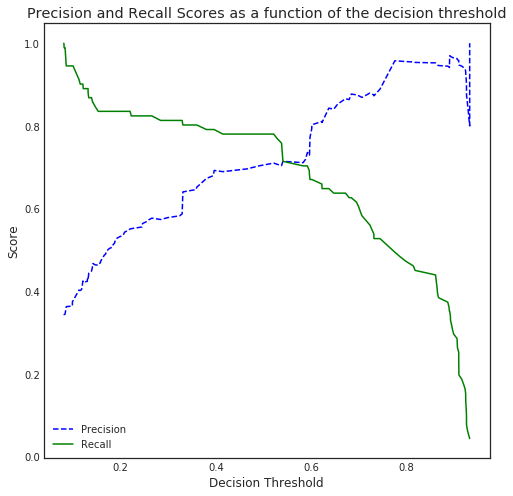

In [87]:
# Store the predictions probability
predictions_prob = clfx_auc_grid_search_result.predict_proba(valid_X)[:,1]

# Generate the precision-recall curve for the classifier 
precision, recall, thresholds = precision_recall_curve(valid_y, predictions_prob)

# Plotting precision_recall vs decision threshold curve 
plot_precision_recall_vs_threshold(precision, recall, thresholds)

#### Plot precision_recall curve with a given threshold


Confusion Matrix

      pred_neg  pred_pos
neg       148        29
pos        20        71 




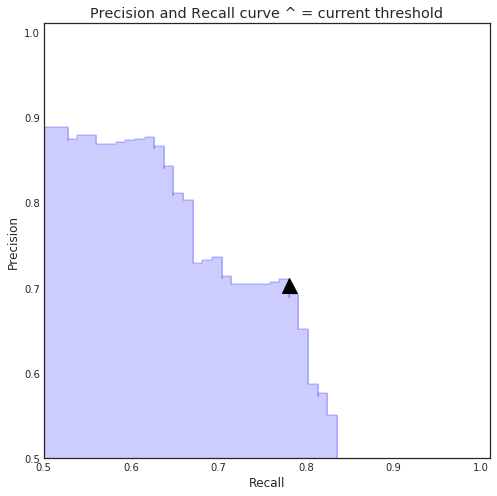

In [88]:
# Plot precision_recall curve with a given threshold
precision_recall_threshold(precision, recall, thresholds, valid_y, predictions_prob, 0.50)

#### Plot ROC curve

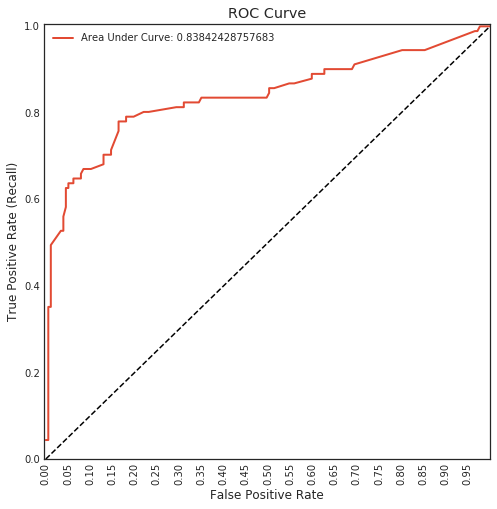

In [89]:
# Calculate False Positive rate, True Positive Rate, AUC Thresholds
fpr, tpr, auc_thresholds = roc_curve(valid_y, predictions_prob)

# Plot ROC-AUC curve
plot_roc_curve(fpr, tpr, 'Area Under Curve: {}'.format(auc(fpr, tpr)))

The first strategy doesn’t yield impressive results for recall_score & precision_score. It also doesn’t improve accuracy. Therefore we should choose the best configuration based on all four `mean_test_accuracy_score`, `mean_test_AUC`, `mean_test_precision_score` & `mean_test_recall_score` metrics.

#### 5.2.3.4 **Second strategy**

**Adjust the decision threshold to identify the operating point**

>The decision threshold for accuracy is fixed at 0.5. Hence this strategy of finding the right operating point (trade-off between precision & recall) is applicable only in case of improving either precision or recall.

The `precision_recall_curve` and `roc_curve` are useful tools to visualize the sensitivity-specificty tradeoff in the classifier. They help inform a data scientist where to set the decision threshold of the model to maximize either sensitivity or specificity. This is called the “operating point” of the model.

>The key to understanding how to fine tune classifiers in scikit-learn is to understand the methods`.predict_proba()` and `.decision_function()`. These return the raw probability that a sample is predicted to be in a class. This is an important distinction from the absolute class predictions returned by calling the `.predict()` method.

To make this method generalizable to all classifiers in scikit-learn, know that some classifiers (like XGB, RandomForest) use `.predict_proba()` while others (like SVC) use `.decision_function()`. The default threshold for XGBClassifier is 0.5, so use that as a starting point.

You can use any of the `best classifier found through Grid Search` and play with threshold to increase either precision or recall.

In [90]:
# For classifiers with decision_function, this achieves similar results
# predictions_prob = classifier.decision_function(test)

# Store the predictions probability
predictions_prob = clfx_recall_grid_search_result.predict_proba(valid_X)[:,1]

# Generate the precision-recall curve for the classifier 
precision, recall, thresholds = precision_recall_curve(valid_y, predictions_prob)

#### Plot precision_recall curve with a given threshold

Re-execute this function for several iterations, changing `t` each time, to tune the threshold until there are `0 False Negatives` or `0 False Positives` depending upon the requirement. 


Confusion Matrix

      pred_neg  pred_pos
neg       148        29
pos        22        69 




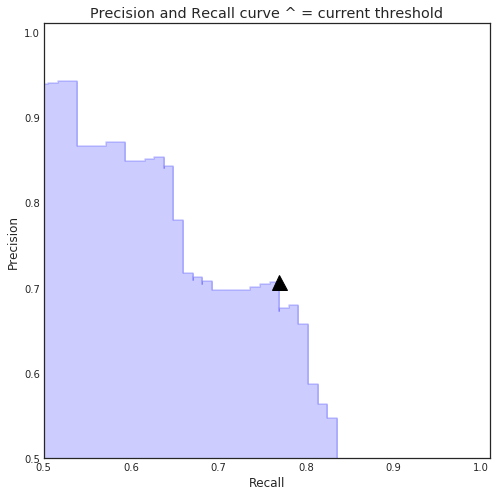

In [91]:
# Plot precision_recall curve with a given threshold
precision_recall_threshold(precision, recall, thresholds, valid_y, predictions_prob, 0.50)

#### Plot precision_recall vs decision threshold curve 

Another way to view the `trade off between precision and recall` is to plot them together as a function of the decision threshold.

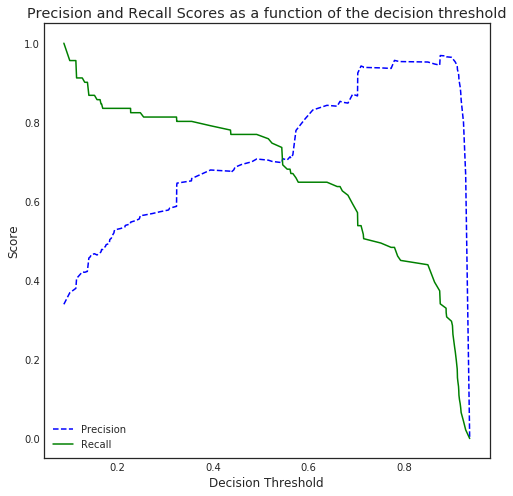

In [92]:
# Plotting precision_recall vs decision threshold curve 
plot_precision_recall_vs_threshold(precision, recall, thresholds)

#### Plot ROC curve

Finally, the ROC curve shows to achieve a recall of 1.0 (if maximum recall is the goal) at near 0.4 precision. Hence we should select `an operating point` that has `good tradeoff between precision & recall` depending upon the goal.

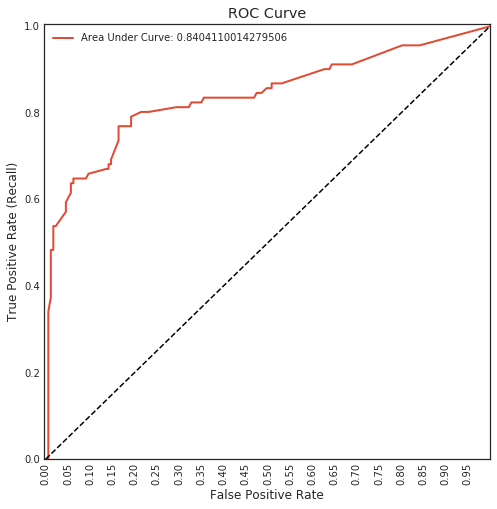

In [93]:
# Calculate False Positive rate, True Positive Rate, AUC Thresholds
fpr, tpr, auc_thresholds = roc_curve(valid_y, predictions_prob)

# Plot ROC-AUC curve
plot_roc_curve(fpr, tpr, 'Area Under Curve: {}'.format(auc(fpr, tpr)))

### 5.2.3.5 Grid Search Results

Let's analyse all the results from precision, recall & AUC Grid Searches. Our focus is on acheiving maximum accuracy score alongwith high ROC-AUC.

*The above best estimator configuration found through exhaustive Grid Search should be used to train the model again on train dataset (usually whole train+valid data in case of final model iterations).*

In [94]:
all_results_df = pd.concat([results_precision_head, results_recall_head, results_auc_head], axis=0)
all_results_df.sort_values(by=['mean_test_accuracy_score', 'mean_test_AUC', 'mean_test_precision_score', 'mean_test_recall_score'] , ascending=False)

mean_test_AUC  mean_test_accuracy_score  mean_test_precision_score  \
420           0.897                     0.843                      0.845   
419           0.898                     0.841                      0.844   
421           0.896                     0.841                      0.844   
166           0.901                     0.839                      0.820   
167           0.901                     0.839                      0.820   
422           0.897                     0.839                      0.841   
165           0.900                     0.838                      0.819   
196           0.894                     0.838                      0.801   
244           0.900                     0.836                      0.825   
341           0.898                     0.836                      0.842   
603           0.899                     0.831                      0.817   
6369          0.884                     0.817                      0.765   
8213          0.881                     0.814                      0.759   
7733          0.881                     0.814                      0.759   
8293          0.881                     0.814                      0.759   

      mean_test_recall_score param_learning_rate param_max_depth  \
420                    0.745                0.01               5   
419                    0.741                0.01               5   
421                    0.741                0.01               5   
166                    0.769                0.01               2   
167                    0.769                0.01               2   
422                    0.741                0.01               5   
165                    0.765                0.01               2   
196                    0.793                0.01               2   
244                    0.753                0.01               3   
341                    0.729                0.01               4   
603                    0.749                0.01               7   
6369                   0.789                0.51               4   
8213                   0.789                0.61              12   
7733                   0.789                0.61               6   
8293                   0.789                0.61              13   

     param_min_child_weight param_n_estimators  
420                       2                400  
419                       2                350  
421                       2                450  
166                       0                500  
167                       0                550  
422                       2                500  
165                       0                450  
196                       4                400  
244                       0                400  
341                       2                450  
603                       5                350  
6369                      6                250  
8213                      6                450  
7733                      6                450  
8293                      6                450

### Training again on the best result obtained from Grid Search

In [127]:
# XGB classifier trained again
# model = XGBClassifier(learning_rate=0.21, max_depth=3, min_child_weight=9, n_estimators=200, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)

model = XGBClassifier(learning_rate=0.21, max_depth=2, min_child_weight=9, n_estimators=300, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.21, max_delta_step=0,
       max_depth=2, min_child_weight=9, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=21, silent=True, subsample=1)

### Prediction

In [128]:
# Train & test score on validation data
print ('Train Accuracy: ', np.round(model.score( train_X , train_y )*100, 2) , '\nTest Accuracy on validation data: ', np.round(model.score( valid_X , valid_y )*100, 2))

Train Accuracy:  89.25 
Test Accuracy on validation data:  82.84


#### Best Grid Search Params & Accuracy

`best_grid_search_params` = {'`learning_rate'` : 0.21, `'max_depth'` : 2, `'min_child_weight'` : 9, `'n_estimators'` : 300}

`Accuracy` on the best Grid Search parameters: `82.84%`

Please check the following articles for further information on Grid Search CV.

* [sklearn-evaluation-framework](https://blancas.io/sklearn-evaluation/user_guide/grid_search.html)
* [Parfit — quick and powerful hyper-parameter optimization with visualizations](https://medium.com/mlreview/parfit-hyper-parameter-optimization-77253e7e175e)

---

### 5.2.4 BayesSearchCV Optimization

`Bayesian optimization over hyper parameters.`

BayesSearchCV implements a `fit` and a `score` method. It also implements `predict`, `predict_proba`, `decision_function`, `transform` and `inverse_transform` if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

**In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.**

Recent results suggest Bayesian hyperparameter optimization of machine learning models is more efficient than manual, random, or grid search.
* Better overall performance on the test set
* Less time required for optimization

#### 5.2.4.1 Bayes Search CV Parameters Space

In [496]:
number_of_experiments = 50
random_state = 21
cores = -1

# Classifier for Bayes Searching
clf = XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='auto',
        early_stopping_rounds=30
    )

# Bayes search parameters space
param_grid = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10, 1),
        'max_depth': (0, 20, 1),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 10, 1),
        'n_estimators': (100, 600, 10)
    }

print('Parameter Grid\n')
pprint.pprint(param_grid)

param_grid_len = reduce(lambda x, y: x*y, [len(param) for param in param_grid.values()] )
print('\nParameter Size: ', param_grid_len)

Parameter Grid

{'colsample_bylevel': (0.01, 1.0, 'uniform'),
 'colsample_bytree': (0.01, 1.0, 'uniform'),
 'gamma': (1e-09, 0.5, 'log-uniform'),
 'learning_rate': (0.01, 1.0, 'log-uniform'),
 'max_depth': (0, 20, 1),
 'min_child_weight': (0, 10, 1),
 'n_estimators': (100, 600, 10),
 'reg_alpha': (1e-09, 1.0, 'log-uniform'),
 'reg_lambda': (1e-09, 1000, 'log-uniform')}

Parameter Size:  19683


#### 5.2.4.2 Bayes Searching

In [492]:
# BayesSearchCV initialization
bayes_search = BayesSearchCV(
    estimator = clf,
    search_spaces = param_grid,    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=21
    ),
    n_jobs = cores,
    n_iter = number_of_experiments,   
    verbose = 0,
    refit = True,
    random_state = 21,
    return_train_score=True
)
    

# Status callback durring bayesian hyperparameter search
def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_search.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_search.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_search.best_score_, 4),
        bayes_search.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_search.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")
    
    
# Setting refit='AUC', refits an estimator on the whole dataset with the parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``bs.grid_scores_`` along with parameters like ``bs.best_score_``, ``bs.best_params_`` and ``bs.total_iterations`

# Defining bayes_search_wrapper function
def bayes_search_wrapper(bayes_search=bayes_search, train_X=train_X, train_y=train_y, valid_X=valid_X , valid_y=valid_y, refit_score='AUC'):
    """
    fits a BayesSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """

    bayes_search.fit(train_X , train_y, callback=status_print)

    # make the predictions
    predictions = bayes_search.predict(valid_X)
    
    # Best estimator configuration
    print('\nBest estimator for {}\n\n{}'.format(refit_score, bayes_search.best_params_))

    # confusion matrix on the test data.
    print('\nConfusion matrix of the XGB classifier optimized for {} metric on the test data\n\n'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(valid_y, predictions),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    
    # Calculate the prediction score
    predictions_prob = bayes_search.predict_proba(valid_X)[:, 1]
    
    # Calculate False Positive rate, True Positive Rate, AUC Thresholds
    fpr, tpr, auc_thresholds = roc_curve(valid_y, predictions_prob)

    # Plot ROC-AUC curve
    plot_roc_curve(fpr, tpr, 'Area Under Curve: {}'.format(auc(fpr, tpr)))
    
    return bayes_search

Total Number of iterations in bayes_search : 450 

Model #1
Best ROC-AUC: 0.5
Best params: {'reg_alpha': 0.6139966732716841, 'max_depth': 0, 'gamma': 8.629527922731328e-07, 'colsample_bytree': 0.04274813813171353, 'colsample_bylevel': 0.4443970361486894, 'min_child_weight': 1, 'learning_rate': 0.28172017106108804, 'n_estimators': 10, 'reg_lambda': 0.37256589537917784}

Model #2
Best ROC-AUC: 0.8444
Best params: {'reg_alpha': 0.00014909944411882237, 'max_depth': 1, 'gamma': 0.0013357199220082401, 'colsample_bytree': 0.2855220483293149, 'colsample_bylevel': 0.026484639294976874, 'min_child_weight': 0, 'learning_rate': 0.045916158374398955, 'n_estimators': 100, 'reg_lambda': 2.941457131995684e-06}

Model #3
Best ROC-AUC: 0.8555
Best params: {'reg_alpha': 0.00538548121981846, 'max_depth': 1, 'gamma': 2.295931783485123e-07, 'colsample_bytree': 0.3590767043808268, 'colsample_bylevel': 0.5278773129423441, 'min_child_weight': 10, 'learning_rate': 0.19316200286397872, 'n_estimators': 600, 'reg_

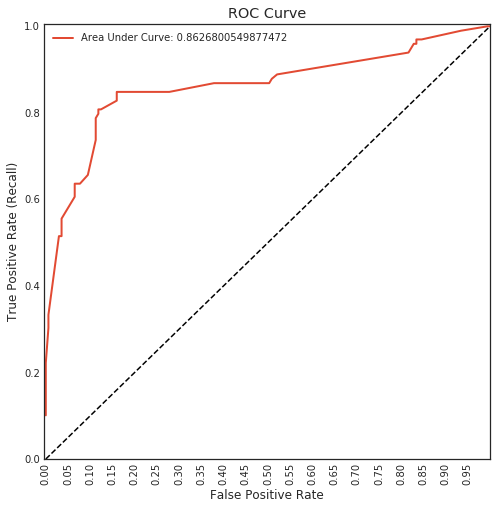

In [493]:
print('Total Number of iterations in bayes_search :', bayes_search.total_iterations, '\n')

# Calling Bayes Search on refit_score='AUC'
bayes_search_result = bayes_search_wrapper(bayes_search, train_X , train_y, valid_X , valid_y, refit_score='AUC')

Finally, the ROC curve has `AUC` of `87.20%`. We should select `an optimal operating point` that has `good tradeoff between precision & recall` depending upon the goal. 

### Training again on the best result obtained from Bayes Search

In [149]:
# XGB classifier trained again
params = {'min_child_weight': 0, 'n_estimators': 600, 'reg_alpha': 1.4531969856530534e-07, 'learning_rate': 1.0, 'gamma': 1e-09, 'colsample_bytree': 0.8142332802717231, 'colsample_bylevel': 0.44622350872769223, 'reg_lambda': 1000.0, 'max_depth': 20}

model = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.44622350872769223,
       colsample_bytree=0.8142332802717231, gamma=1e-09, learning_rate=1.0,
       max_delta_step=0, max_depth=20, min_child_weight=0, missing=None,
       n_estimators=600, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=21,
       reg_alpha=1.4531969856530534e-07, reg_lambda=1000.0,
       scale_pos_weight=1, seed=21, silent=True, subsample=1)

### Prediction

In [150]:
# Train & test score on validation data
print ('Train Accuracy: ', np.round(model.score( train_X , train_y )*100, 2) , '\nTest Accuracy on validation data: ', np.round(model.score( valid_X , valid_y )*100, 2))

Train Accuracy:  91.01 
Test Accuracy on validation data:  80.97


#### Best Bayes Search Params & Accuracy

`best_bayes_search_params` = {`'min_child_weight'`: 0, `'n_estimators'`: 600, `'reg_alpha'`: 1.4531969856530534e-07, `'learning_rate'`: 1.0, `'gamma'`: 1e-09, `'colsample_bytree'`: 0.8142332802717231, `'colsample_bylevel'`: 0.44622350872769223, `'reg_lambda'`: 1000.0, `'max_depth'`: 20}

`Accuracy` on the best Bayes Search parameters: `80.97%`

Please check [Bayes Search CV Framework](https://scikit-optimize.github.io/#skopt.BayesSearchCV) for further information on Bayes Search CV.

---

### 5.2.5 Hyperopt: Distributed Asynchronous Hyper-parameter Optimization

`Bayesian optimization over hyper parameters.`

Hyperopt is a Python library for serial and parallel optimization over awkward search spaces, which may include real-valued, discrete, and conditional dimensions. It can use the Tree-structured Parzen Estimator (TPE) algorithm, which explore intelligently the search space while narrowing down to the estimated best parameters.

It is hence a good method for meta-optimizing a neural network which is itself an optimisation problem: tuning a neural network uses gradient descent methods, and tuning the hyperparameters needs to be done differently since gradient descent can’t apply. Therefore, Hyperopt can be useful not only for tuning hyperparameters such as the learning rate, but also to tune more fancy parameters in a flexible way, such as changing the number of layers of certain types, or the number of neurons in a layer, or even the type of layer to use at a certain place in the network given an array of choices, each with nested tunable hyperparameters.

*This is an oriented random search, in contrast with a Grid Search where hyperparameters are pre-established with fixed steps increase. Random Search for Hyper-Parameter Optimization (such as what Hyperopt do) has proven to be an effective search technique. To sum up, it is more efficient to search randomly through values and to intelligently narrow the search space rather than looping on fixed sets of values for the hyperparameters.*

There are two choices for hyperparameter optimization algorithm in Hyperopt: `Random` and `Tree Parzen Estimator`. We can compare the results from the both algorithm using the suggest option which automatically configures the best algorithm for us.

#### Standardization or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

#### Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

### 5.2.5.1 Space Visualization

Let's plot the result of sampling from different parameter's space distribution.

In [499]:
# Parameter's space
hyper_space ={
        'n_estimators': scope.int(hp.quniform('n_estimators', 200, 600, 1)),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  scope.int(hp.choice('max_depth', np.arange(1, 30, dtype=int))),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.quniform('lambda', 1, 2, 0.1)
    }

print('Sampling space example\n')
pprint.pprint(sample(hyper_space))

Sampling space example

{'alpha': 1.0,
 'colsample_bytree': 0.8500000000000001,
 'eta': 0.225,
 'gamma': 0.65,
 'lambda': 1.2000000000000002,
 'max_depth': 17,
 'min_child_weight': 5.0,
 'n_estimators': 297,
 'subsample': 0.9500000000000001}


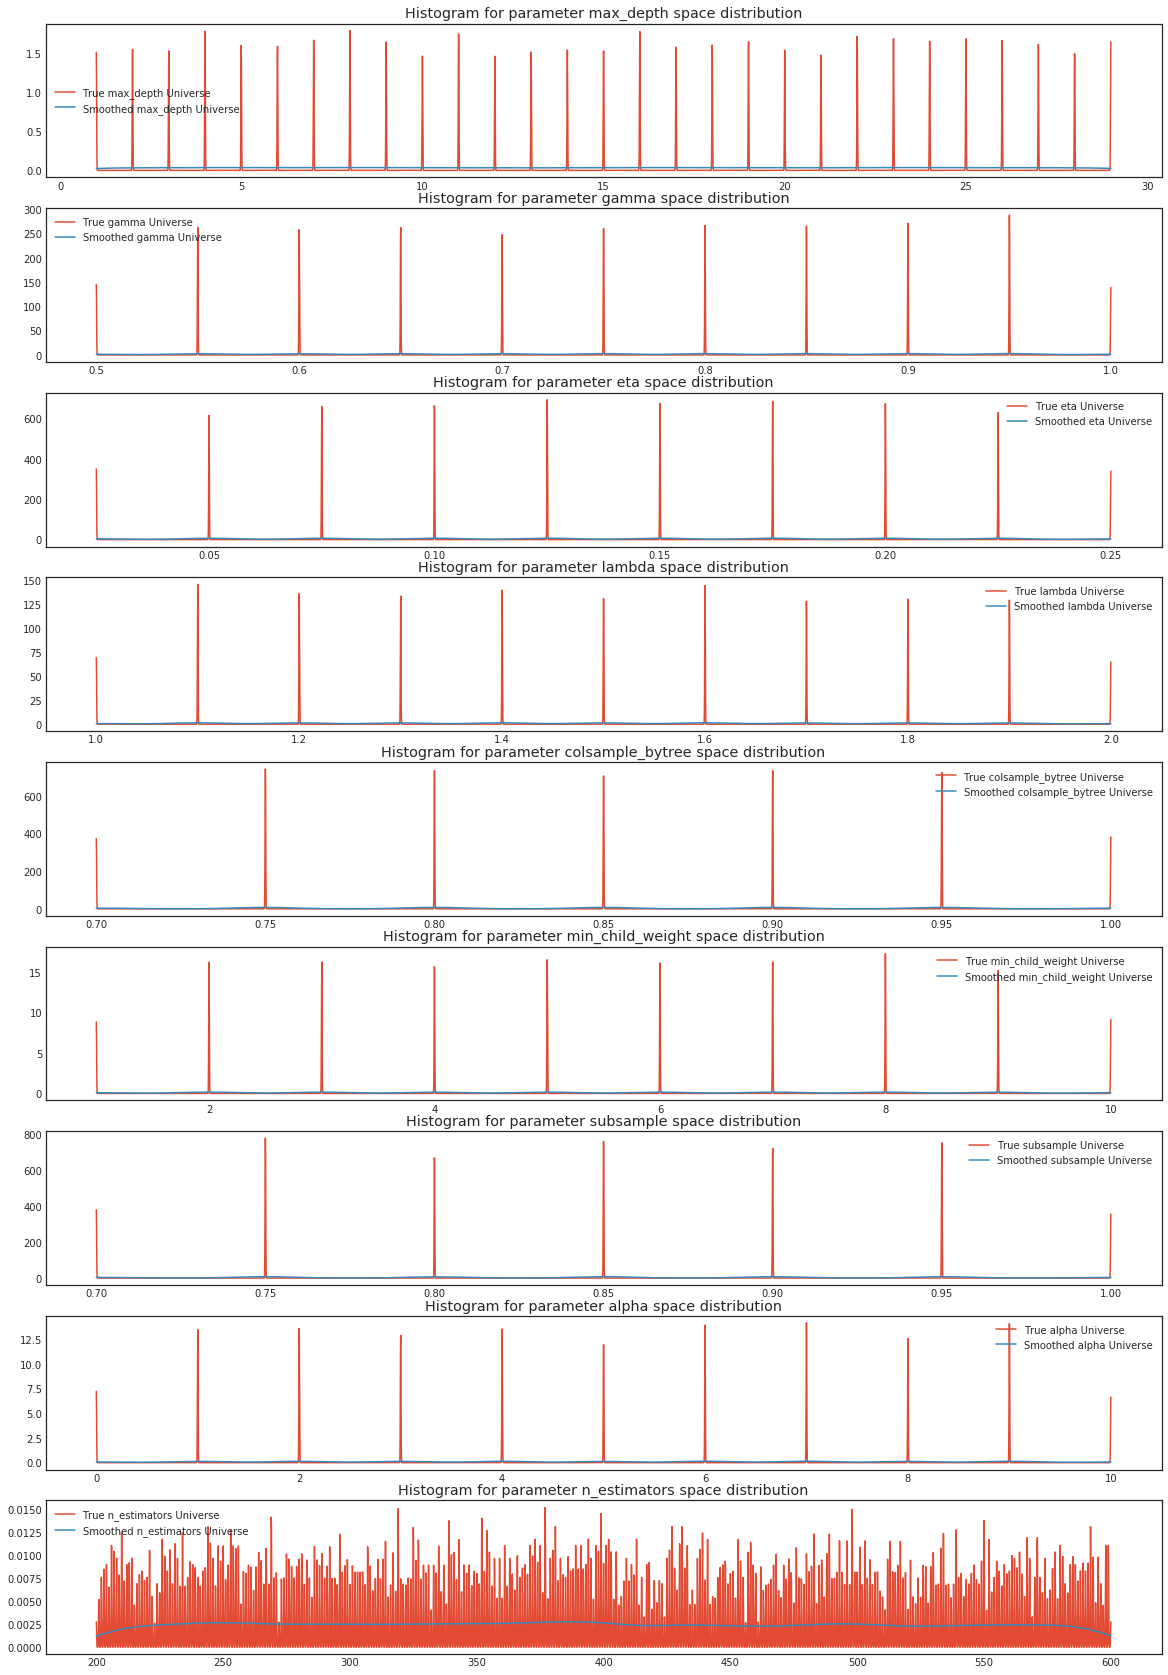

In [501]:
# Plot different parameter's space distribution after sampling for n_samples

n_samples = 5000
universe = {}

fig, axes = plt.subplots(nrows=len(hyper_space.keys()), ncols=1, figsize=(20, 30))
cmap = plt.cm.jet

# Iterating over different trials & parameters
for index, (param, param_space) in enumerate(hyper_space.items()):
    # Sampling for n_samples
    universe[param] = [ pyll.stochastic.sample(hyper_space[param]) for _ in range(n_samples) ]  
    param_domain = np.linspace(min(universe[param]), max(universe[param]), n_samples)
        
    # KDE calculation
    hist = gaussian_kde(universe[param], 0.001)
    axes[index].plot(param_domain, hist(param_domain), label='True {} Universe'.format(param))
    
    blurred_hist = gaussian_kde(universe[param], 0.1)
    axes[index].plot(param_domain, blurred_hist(param_domain), label='Smoothed {} Universe'.format(param))
    
    axes[index].set_title('Histogram for parameter {} space distribution'.format(param))
    axes[index].legend()

plt.show()

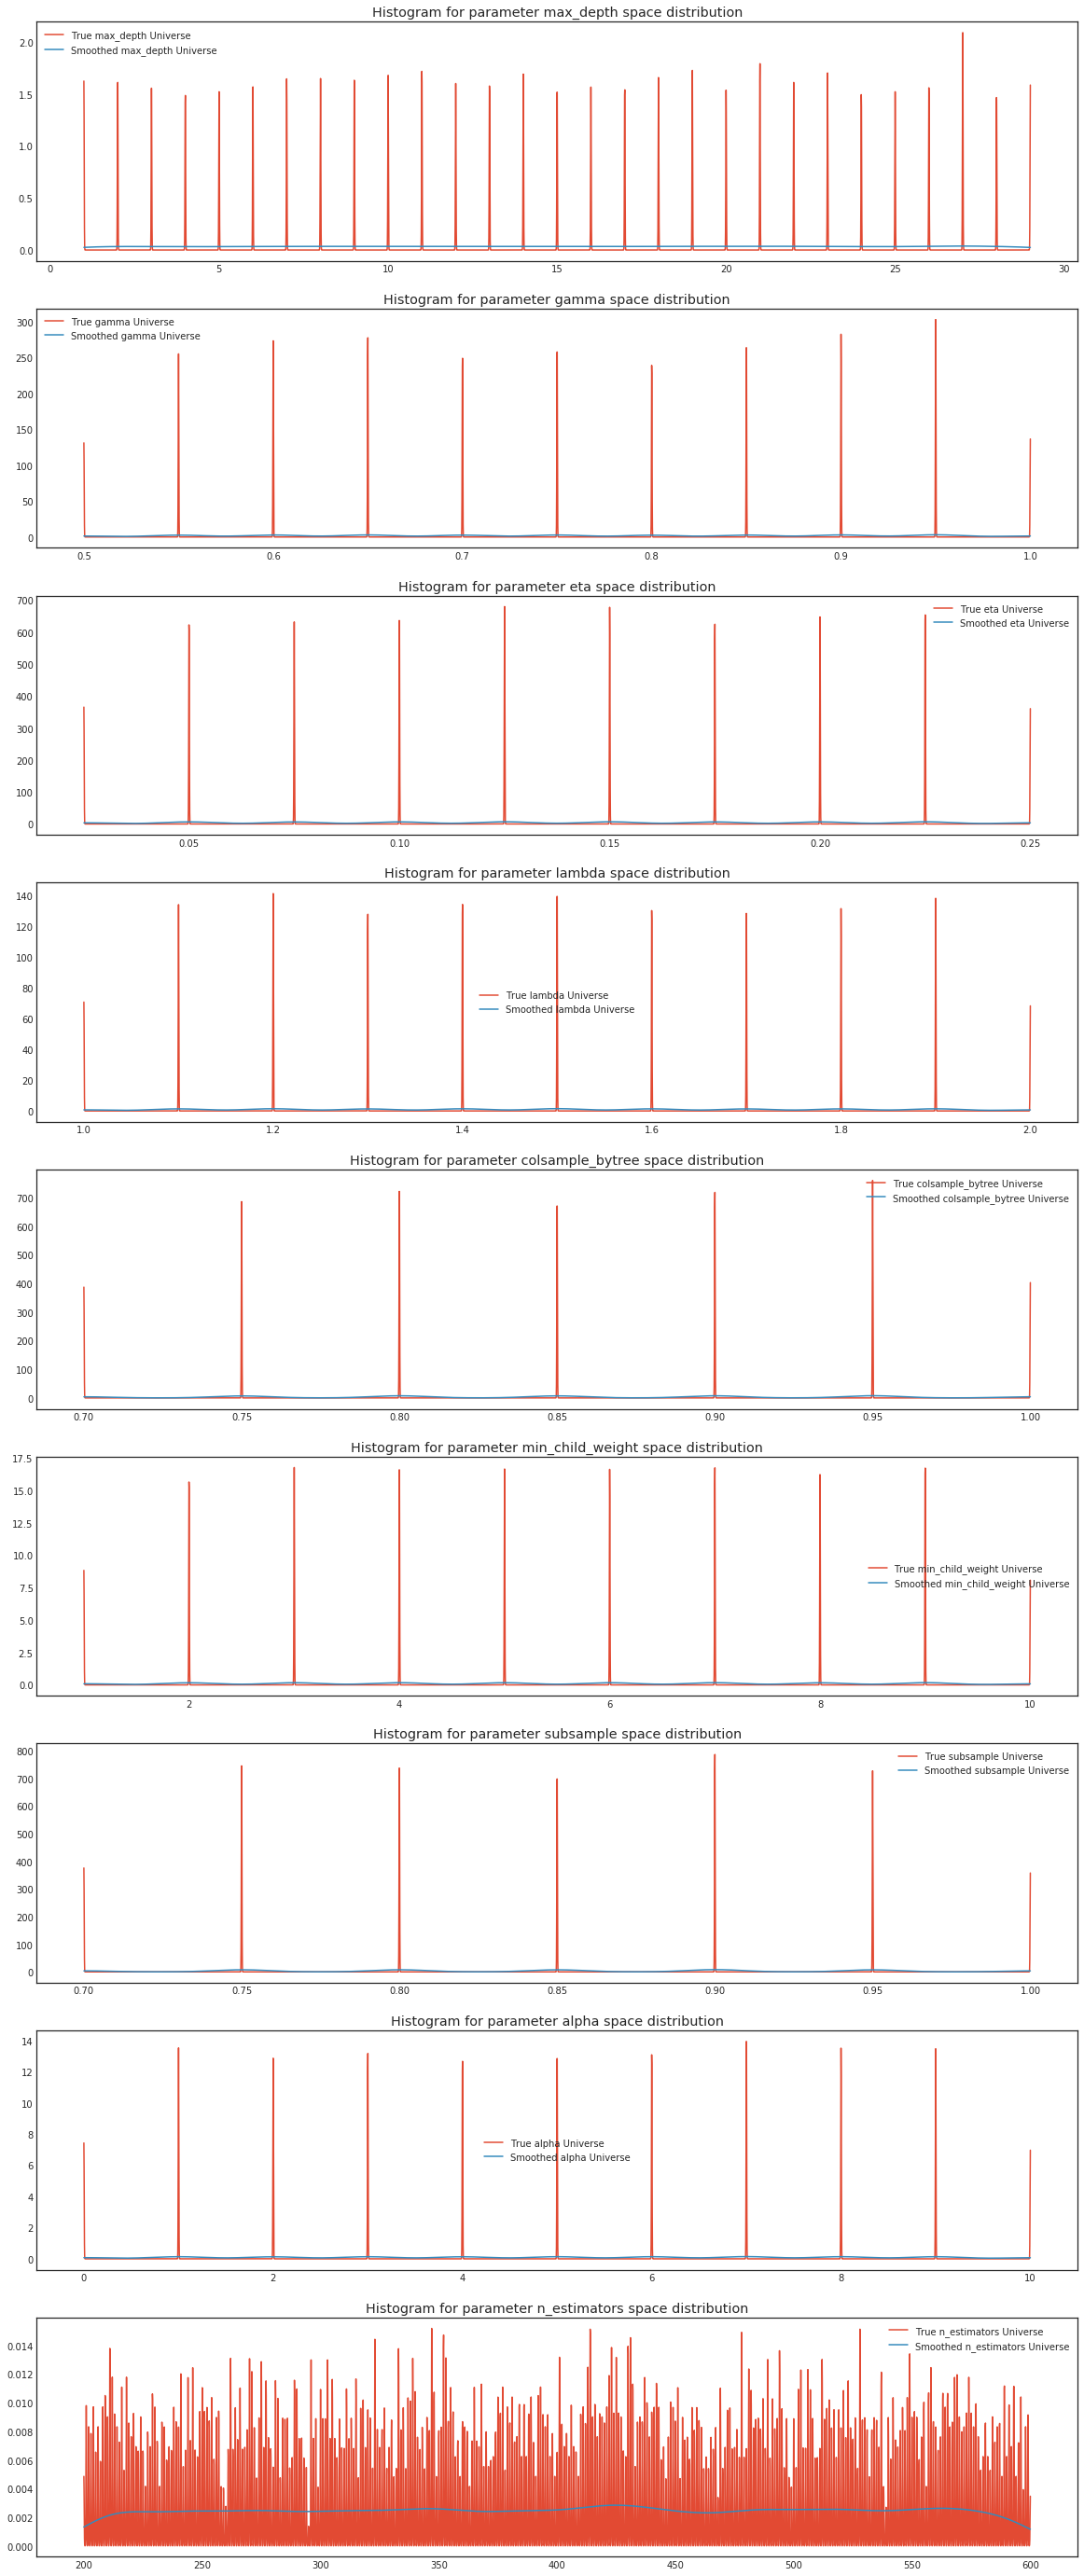

In [503]:
# Plot different parameter's space distribution after sampling for n_samples

n_samples = 5000
universe = {}

fig, axes = plt.subplots(nrows=len(hyper_space.keys()), ncols=1, figsize=(20, 50))
cmap = plt.cm.jet

# Iterating over different trials & parameters
for ax, (param, param_space) in zip(axes.ravel(), hyper_space.items()):
    # Sampling for n_samples
    universe[param] = [ pyll.stochastic.sample(hyper_space[param]) for _ in range(n_samples) ]  
    param_domain = np.linspace(min(universe[param]), max(universe[param]), n_samples)
        
    # KDE calculation
    hist = gaussian_kde(universe[param], 0.001)
    ax.plot(param_domain, hist(param_domain), label='True {} Universe'.format(param))

    blurred_hist = gaussian_kde(universe[param], 0.1)
    ax.plot(param_domain, blurred_hist(param_domain), label='Smoothed {} Universe'.format(param))
    
#     sns.distplot(np.array(universe[param]), ax=axes[int(index)], kde=True, kde_kws={'bw':(0.001)}, hist=True, rug=True, label='True {} Universe'.format(param))
#     sns.distplot(np.array(universe[param]), ax=axes[int(index)], kde=True, kde_kws={'bw':(0.1)}, hist=True, rug=True, label='Smoothed {} Universe'.format(param))
#     sns.kdeplot(np.array(universe[param]) , ax=axes[int(index), 0], label='{} Universe'.format(param))

    ax.set_title('Histogram for parameter {} space distribution'.format(param))
    ax.legend(loc='best')
    
    del universe[param]

plt.show()

### 5.2.5.2 Hyperopt Search Algorithms

>Hyperopt currently implements three search algorithms:
1. Tree of Parzen Estimators using **`hyperopt.tpe`**
2. Random Search using **hyperopt.hp.rand** which more or less does the same thing as sklearn's RandomizedSearchCV
3. Gaussian Processes using **hyperopt.hp.gp**

#### 1. Tree Parzen Estimator (algorithm = tpe.suggest)
* AUC as an evaluation metric

In [561]:
iterations = 1000
random_state = 21
cores = -1
best = 0
    
# Define the XGB  function as the objective
def objective(space):

    global best
    
    train_X_ = train_X
    valid_X_ = valid_X

    # Normalizing or scaling the data
    if 'normalize' in space:
        if space['normalize'] == 1:
            train_X_ = normalize(train_X_)
            valid_X_ = normalize(valid_X_)
            del space['normalize']
            
    if 'scale' in space:
        if space['scale'] == 1:
            train_X_ = scale(train_X_)
            valid_X_ = scale(valid_X_)
            del space['scale']
            
    eval_set  = [(train_X , train_y), ( valid_X , valid_y )]
    
    clf = XGBClassifier(n_estimators = 10000,
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'])
    clf.fit(train_X , train_y,
            eval_set=eval_set, eval_metric="auc",
            early_stopping_rounds=100, verbose=False)

    # evaluate predictions
    predictions_prob = clf.predict_proba(valid_X, ntree_limit=clf.best_iteration + 1)[:,1]
    auc = roc_auc_score(valid_y, predictions_prob)
    
    if auc > best:
        best = auc
        print('\nBest AUC score: {}'.format(np.round(best*100, 2)))
        print('Space Parameters\n')
        pprint.pprint(space)

    return {'loss': 1-auc, 'status': STATUS_OK }


space ={
        'n_estimators': scope.int(hp.quniform('n_estimators', 200, 600, 1)),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  scope.int(hp.choice('max_depth', np.arange(1, 30, dtype=int))),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.quniform('lambda', 1, 2, 0.1),
        'nthread': cores,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'seed': random_state,
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
#         'silent' : 1
#         'num_class' : 9,
#         'objective': 'multi:softprob'
    }

print('Sampling space example\n')
pprint.pprint(sample(space))

# Trials keeps track of all experiments; These can be saved and loaded back into a new batch of experiments
tpe_auc_trials = Trials()

# The algorithm tpe.suggest runs the Tree-structured Parzen estimator
best_tpe_auc = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=iterations,
            trials=tpe_auc_trials)

print('\n\nThe best parameteres discovered through HyperOpt tpe.suggest algorithm using AUC as an evaluation metric\n\n', best_tpe_auc)

Sampling space example

{'alpha': 9.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.9500000000000001,
 'eta': 0.1,
 'gamma': 0.6000000000000001,
 'lambda': 1.7000000000000002,
 'max_depth': 3,
 'min_child_weight': 10.0,
 'n_estimators': 507,
 'normalize': 0,
 'nthread': -1,
 'objective': 'binary:logistic',
 'scale': 1,
 'seed': 21,
 'subsample': 0.9500000000000001}

Best AUC score: 90.3
Space Parameters

{'alpha': 2.0,
 'booster': 'gbtree',
 'colsample_bytree': 1.0,
 'eta': 0.07500000000000001,
 'gamma': 0.75,
 'lambda': 1.4000000000000001,
 'max_depth': 28,
 'min_child_weight': 3.0,
 'n_estimators': 346,
 'nthread': -1,
 'objective': 'binary:logistic',
 'seed': 21,
 'subsample': 0.9500000000000001}

Best AUC score: 90.46
Space Parameters

{'alpha': 9.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.8500000000000001,
 'eta': 0.17500000000000002,
 'gamma': 0.55,
 'lambda': 1.5,
 'max_depth': 22,
 'min_child_weight': 9.0,
 'n_estimators': 304,
 'normalize': 0,
 'nthread': -1,
 'objective'

The `Trials` object allows us to store info at each time step they are stored. We can then print them out and see what the evaluations of the function were for a given parameter at a given time step.

In [562]:
for trial in tpe_auc_trials.trials[:1]:
    pprint.pprint(trial)

{'book_time': datetime.datetime(2018, 9, 1, 16, 55, 28, 974000),
 'exp_key': None,
 'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
          'idxs': {'alpha': [0],
                   'colsample_bytree': [0],
                   'eta': [0],
                   'gamma': [0],
                   'lambda': [0],
                   'max_depth': [0],
                   'min_child_weight': [0],
                   'n_estimators': [0],
                   'normalize': [0],
                   'scale': [0],
                   'subsample': [0]},
          'tid': 0,
          'vals': {'alpha': [2.0],
                   'colsample_bytree': [1.0],
                   'eta': [0.07500000000000001],
                   'gamma': [0.75],
                   'lambda': [1.4000000000000001],
                   'max_depth': [27],
                   'min_child_weight': [3.0],
                   'n_estimators': [346.0],
                   'normalize': [1],
                   'scale': [1],
                   

#### HyperOpt TPE AUC Visualization

We’ll go over two types of visualizations here: `parameters vs time` and `loss vs parameters`. 

In [176]:
# Space parameters to plot & visualize
parameters = ['n_estimators', 'eta', 'max_depth', 'min_child_weight', 'subsample',
              'gamma', 'lambda', 'scale', 'normalize']

# Best parameters discovered through HyperOpt tpe.suggest algorithm using AUC as an evaluation metric
# best_parameters_auc = {'scale': 0, 'min_child_weight': 3, 'n_estimators': 279, 'eta': 0.17500000000000002, 'alpha': 6.0, 'gamma': 0.55, 'normalize': 1, 'max_depth': 4, 'subsample': 0.8, 'lambda': 1.1, 'colsample_bytree': 0.9500000000000001}
# best_parameters_auc = {'scale': 0, 'min_child_weight': 4.0, 'n_estimators': 470, 'eta': 0.05, 'alpha': 8.0, 'gamma': 0.8500000000000001, 'normalize': 1, 'max_depth': 7, 'subsample': 0.7000000000000001, 'lambda': 1.5, 'colsample_bytree': 0.8500000000000001}
# best_parameters_auc = {'scale': 1, 'normalize': 1, 'max_depth': 5, 'gamma': 0.7000000000000001, 'eta': 0.125, 'lambda': 1.6, 'colsample_bytree': 0.8500000000000001, 'min_child_weight': 7.0, 'subsample': 1.0, 'alpha': 6.0, 'n_estimators': 471}
best_parameters_auc = {'scale': 1, 'normalize': 1, 'max_depth': 7, 'gamma': 0.9500000000000001, 'eta': 0.1, 'lambda': 1.2000000000000002, 'colsample_bytree': 0.8, 'min_child_weight': 6.0, 'subsample': 0.9, 'alpha': 9.0, 'n_estimators': 481}

#### parameters vs time plot

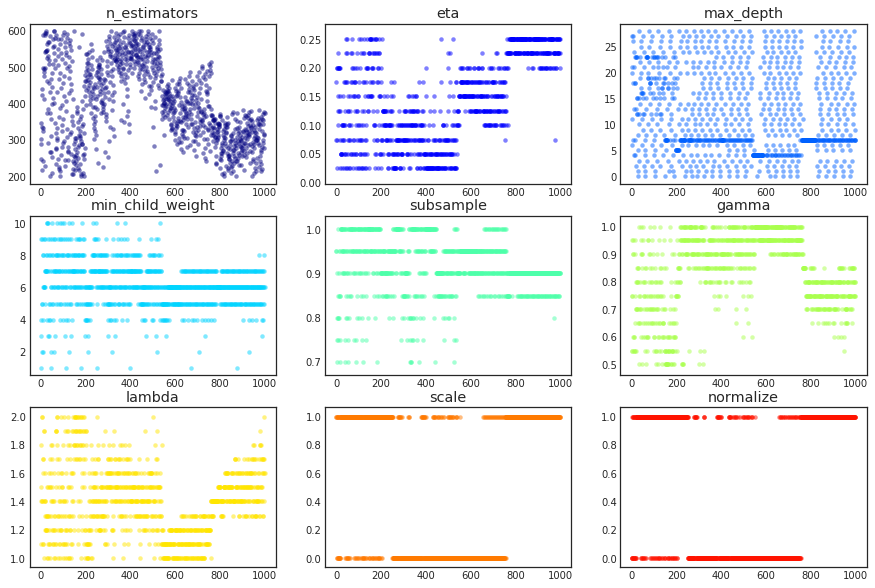

In [564]:
# parameters vs time plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

for index, value in enumerate(parameters):
    
    xs = [t['tid'] for t in tpe_auc_trials.trials]
    ys = np.array([t['misc']['vals'][value] for t in tpe_auc_trials.trials]).ravel()

    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
    axes[int(index/3), index%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(index)/len(parameters)))
    axes[int(index/3), index%3].set_title(value)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

We can see that initially the algorithm picks values from the whole range equally (uniformly), but as time goes on and more is learned about the parameter’s effect on the objective function, the algorithm focuses more and more on areas in which it thinks it will gain the most  Area Under Curve (the goal of HyperOpt). It still explores the whole solution space, but less frequently.

#### auc (1-loss) vs parameters plot

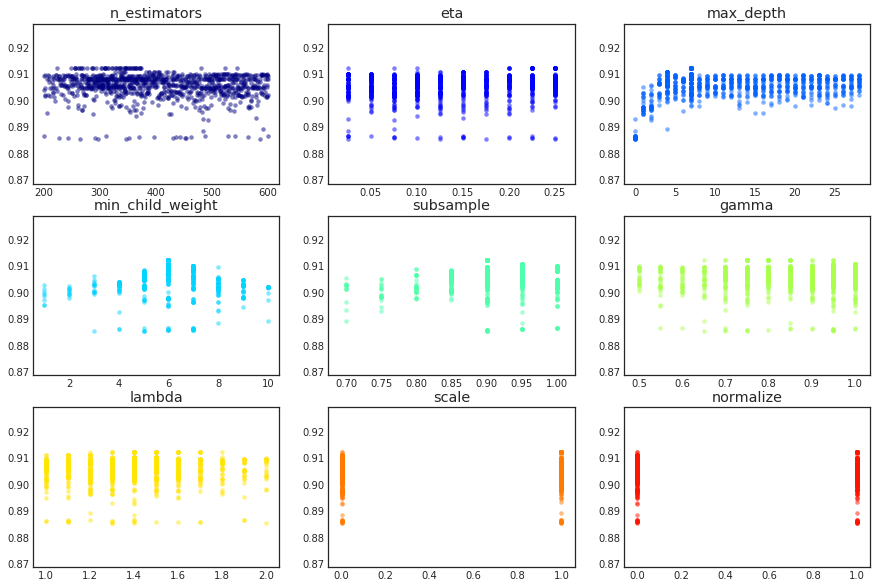

In [565]:
# AUC (1-loss) vs parameters plot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

for index, value in enumerate(parameters):
    
    xs = np.array([t['misc']['vals'][value] for t in tpe_auc_trials.trials]).ravel()
    ys = [1-t['result']['loss'] for t in tpe_auc_trials.trials]
    
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
    axes[int(index/3), index%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(index)/len(parameters)))
    axes[int(index/3), index%3].set_title(value)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

---

#### ROC-AUC visualization against a parameter

The following function trains XGB classifier on the training data and calculates `fpr`, `tpr`, `thresholds` values & generates `ROC` & `Precision-Recall ` curve based on the test set.

In [126]:
# https://www.kaggle.com/dstuerzer/optimization-of-xgboost
def get_curves(train_X , train_y, valid_X, valid_y, param_grid):

    clf = xgb.XGBClassifier(**param_grid)
    clf.fit(train_X , train_y)
    y_prob = clf.predict_proba(valid_X)[:, 1]
    fpr, tpr, thresholds_roc = roc_curve(valid_y, y_prob)
    prec, rec, thresholds_pr = precision_recall_curve(valid_y, y_prob)
    
    feat_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    return fpr, tpr, prec, rec

This function now calls `get_curves` N_iter times and computes averaged ROC- and PR-curves. I have chosen N_iter = 300 and obtained very smooth ROC-curves. This is important, since we want to use the curves to find the optimal parameters. Too much noise (i.e. not enough smoothing) will likely obfuscate the results.

In [127]:
def gen_curves(train_X , train_y, valid_X, valid_y, param_grid):
    
    N_iter = 300
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100000)
    
    mean_prec = 0.0
    mean_rec = np.linspace(0, 1, 100000)
    
    for n in range(N_iter):
        fpr, tpr, prec, rec = get_curves(train_X , train_y, valid_X, valid_y, param_grid)
        prec = list(reversed(prec)) #reverse, otherwise the interp doesn not work
        rec = list(reversed(rec))
        mean_tpr  += np.interp(mean_fpr, fpr, tpr)
        mean_prec += np.interp(mean_rec, rec, prec)

    mean_tpr /= N_iter
    mean_prec /= N_iter
    
    return mean_fpr, mean_tpr, mean_prec, mean_rec

And this function finally plots the curves for different parameters.

In [130]:
def plot_roc(train_X , train_y, valid_X, valid_y, param_grid, param, param_values):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,7));
    for param_value in param_values:
        param_grid[param] = param_value
        print('\nParameter Grid\n\n', param_grid)
        
        mean_fpr, mean_tpr, mean_prec, mean_rec = gen_curves(train_X , train_y, valid_X, valid_y, param_grid)
        ax1.plot(mean_fpr, mean_tpr, label = param+" = "+str(param_value))
        ax2.plot(mean_rec, mean_prec, label = param+" = "+str(param_value))
        
    ax1.axvline(2e-4, color='b', linestyle='dashed', linewidth=2)
    ax1.set_xlim([0, 0.0005])
    ax1.set_ylim([0.5, 0.95])
    ax1.set_xlabel('FPR/Fallout')
    ax1.set_ylabel('TPR/Recall')
    ax1.legend(loc="lower right")
    ax1.set_title('ROC')
    
    ax2.set_xlim([0.5, 1])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.legend(loc = "lower left")
    ax2.set_title('PR')
    
    plt.show()


Parameter Grid

 {'n_estimators': 305, 'colsample_bytree': 0.9, 'eta': 0.075, 'gamma': 0.95, 'min_child_weight': 5, 'max_depth': 1, 'subsample': 0.7, 'alpha': 0.0, 'lambda': 1.9}

Parameter Grid

 {'n_estimators': 305, 'colsample_bytree': 0.9, 'eta': 0.075, 'gamma': 0.95, 'min_child_weight': 5, 'max_depth': 2, 'subsample': 0.7, 'alpha': 0.0, 'lambda': 1.9}

Parameter Grid

 {'n_estimators': 305, 'colsample_bytree': 0.9, 'eta': 0.075, 'gamma': 0.95, 'min_child_weight': 5, 'max_depth': 3, 'subsample': 0.7, 'alpha': 0.0, 'lambda': 1.9}


KeyboardInterrupt: 

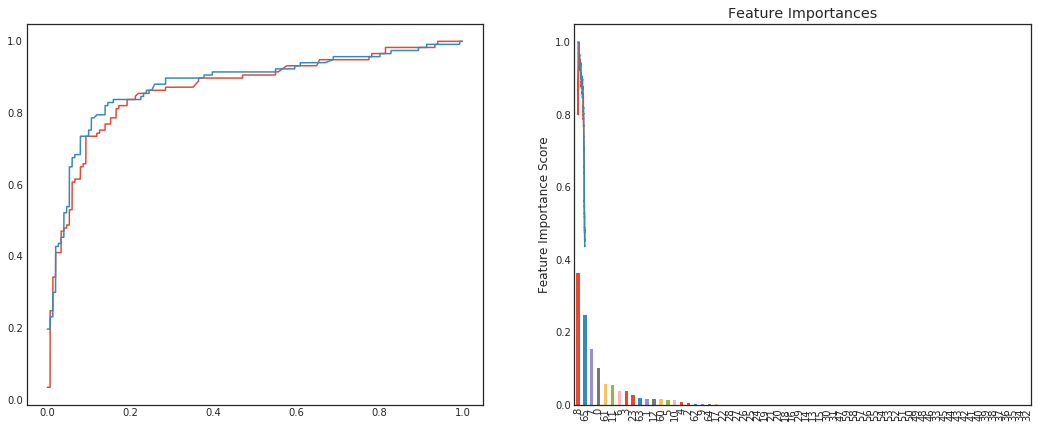

In [131]:
# Let us first vary 'max_depth'
param_grid = {'alpha': 0.0, 'colsample_bytree': 0.9, 'n_estimators': 305, 'lambda': 1.9, 'eta': 0.075, 'min_child_weight': 5, 'max_depth': 23, 'gamma': 0.95, 'subsample': 0.70}

plot_roc(train_X , train_y, valid_X, valid_y, param_grid, 'max_depth', [1,2,3,4,5,7,10,15])

---

#### 2. Tree Parzen Estimator (algorithm = tpe.suggest)
* error (Binary classification error rate) as an evaluation metric

In [505]:
iterations = 1000
random_state = 21
cores = -1
best = 0

# Define the XGB  function as the objective
def objective(space):

    global best
    
    train_X_ = train_X
    valid_X_ = valid_X

    # Normalizing or scaling the data
    if 'normalize' in space:
        if space['normalize'] == 1:
            train_X_ = normalize(train_X_)
            valid_X_ = normalize(valid_X_)
            del space['normalize']
            
    if 'scale' in space:
        if space['scale'] == 1:
            train_X_ = scale(train_X_)
            valid_X_ = scale(valid_X_)
            del space['scale']
            
    eval_set  = [(train_X , train_y), ( valid_X , valid_y )]
    
    clf = XGBClassifier(n_estimators = 10000,
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'])
    clf.fit(train_X , train_y,
            eval_set=eval_set, eval_metric="error",
            early_stopping_rounds=100, verbose=False)

    # evaluate predictions
    y_pred = clf.predict(valid_X, ntree_limit=clf.best_iteration + 1)
    predictions = [round(value) for value in y_pred]
    acc = accuracy_score(valid_y, predictions)
    
    if acc > best:
        best = acc
        print('\nBest accuracy score: {}'.format(np.round(best*100, 2)))
        print('Space Parameters\n')
        pprint.pprint(space)

    return {'loss': -acc, 'status': STATUS_OK }


space ={
        'n_estimators': scope.int(hp.quniform('n_estimators', 200, 600, 1)),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  scope.int(hp.choice('max_depth', np.arange(1, 30, dtype=int))),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.quniform('lambda', 1, 2, 0.1),
        'nthread': cores,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'seed': random_state,
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
#         'silent' : 1
#         'num_class' : 9,
#         'objective': 'multi:softprob'
    }

print('Sampling space example\n')
pprint.pprint(sample(space))

# Trials keeps track of all experiments; These can be saved and loaded back into a new batch of experiments
tpe_acc_trials = Trials()

# The algorithm tpe.suggest runs the Tree-structured Parzen estimator
best_tpe_acc = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=iterations,
            trials=tpe_acc_trials)

print('\n\nThe best parameteres discovered through HyperOpt tpe.suggest algorithm\n\n', best_tpe_acc)

Sampling space example

{'alpha': 9.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.75,
 'eta': 0.15000000000000002,
 'gamma': 0.6000000000000001,
 'lambda': 1.8,
 'max_depth': 28,
 'min_child_weight': 8.0,
 'n_estimators': 596,
 'normalize': 0,
 'nthread': -1,
 'objective': 'binary:logistic',
 'scale': 1,
 'seed': 21,
 'subsample': 0.8500000000000001}

Best accuracy score: 87.31
Space Parameters

{'alpha': 4.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.9500000000000001,
 'eta': 0.05,
 'gamma': 0.55,
 'lambda': 1.5,
 'max_depth': 26,
 'min_child_weight': 7.0,
 'n_estimators': 245,
 'nthread': -1,
 'objective': 'binary:logistic',
 'seed': 21,
 'subsample': 0.75}

Best accuracy score: 87.69
Space Parameters

{'alpha': 3.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.75,
 'eta': 0.15000000000000002,
 'gamma': 0.9,
 'lambda': 1.6,
 'max_depth': 7,
 'min_child_weight': 7.0,
 'n_estimators': 214,
 'nthread': -1,
 'objective': 'binary:logistic',
 'seed': 21,
 'subsample': 1.0}


The best 

#### HyperOpt TPE ACC Visualization

We’ll go over two types of visualizations here: `parameters vs time` and `loss vs parameters`. 

In [174]:
# Space parameters to plot & visualize
parameters = ['n_estimators', 'eta', 'max_depth', 'min_child_weight', 'subsample',
              'gamma', 'lambda', 'scale', 'normalize']

# best_parameters_acc = {'scale': 1, 'min_child_weight': 6, 'n_estimators': 382, 'eta': 0.17500000000000002, 'alpha': 1.0, 'gamma': 1.0, 'normalize': 0, 'max_depth': 2, 'subsample': 0.8, 'lambda': 1.0, 'colsample_bytree': 0.8}
# best_parameters_acc = {'scale': 1, 'min_child_weight': 6, 'n_estimators': 382, 'eta': 0.17500000000000002, 'alpha': 1.0, 'gamma': 1.0, 'normalize': 0, 'max_depth': 2, 'subsample': 0.8, 'lambda': 1.0, 'colsample_bytree': 0.8}
# best_parameters_acc = {'scale': 0, 'min_child_weight': 6.0, 'n_estimators': 341, 'eta': 0.05, 'alpha': 4.0, 'gamma': 0.75, 'normalize': 0, 'max_depth': 1, 'subsample': 0.75, 'lambda': 1.4000000000000001, 'colsample_bytree': 0.8}
best_parameters_acc = {'scale': 1, 'normalize': 1, 'max_depth': 6, 'gamma': 0.9, 'eta': 0.15000000000000002, 'lambda': 1.6, 'colsample_bytree': 0.75, 'min_child_weight': 7.0, 'subsample': 1.0, 'alpha': 3.0, 'n_estimators': 214}

#### parameters vs time plot

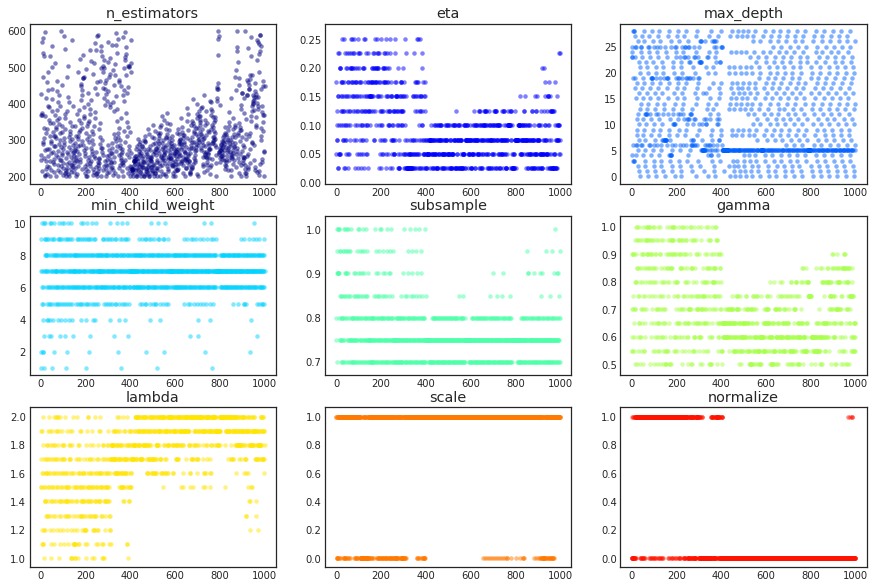

In [508]:
# parameters vs time plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

for index, value in enumerate(parameters):
    
    xs = [t['tid'] for t in tpe_acc_trials.trials]
    ys = np.array([t['misc']['vals'][value] for t in tpe_acc_trials.trials]).ravel()

    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
    axes[int(index/3), index%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(index)/len(parameters)))
    axes[int(index/3), index%3].set_title(value)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

We can see that initially the algorithm picks values from the whole range equally (uniformly), but as time goes on and more is learned about the parameter’s effect on the objective function, the algorithm focuses more and more on areas in which it thinks it will gain the most  accuracy (the goal of HyperOpt). It still explores the whole solution space, but less frequently.

#### accuracy (negative loss) vs parameters plot

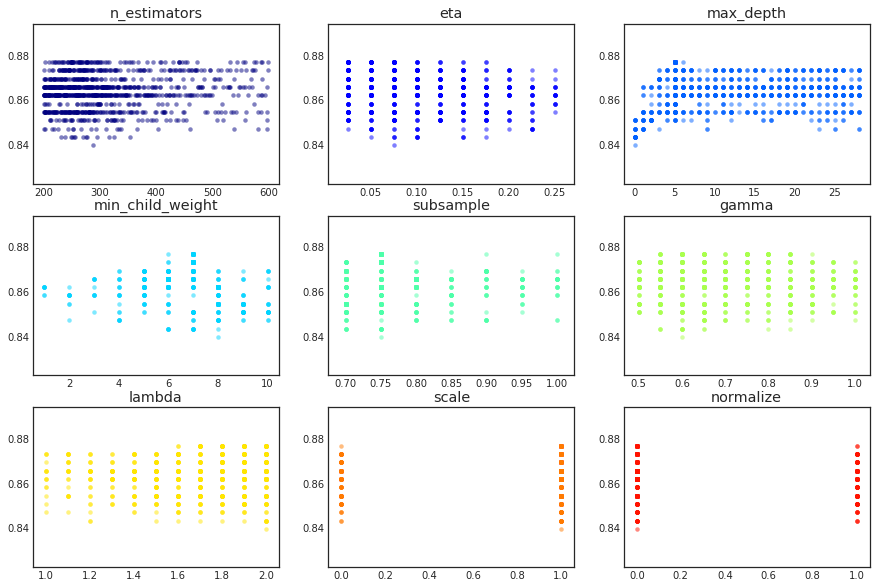

In [510]:
# accuracy (negative loss) vs parameters plot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

for index, value in enumerate(parameters):
    
    xs = np.array([t['misc']['vals'][value] for t in tpe_acc_trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in tpe_acc_trials.trials]
    
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
    axes[int(index/3), index%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(index)/len(parameters)))
    axes[int(index/3), index%3].set_title(value)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

### Training again on the best result obtained from HyperOpt TPE algorithm Search

In [193]:
# XGB classifier trained again on the best_parameters found from AUC & Accuracy
params = best_parameters_auc
# params = best_parameters_acc

model = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
model.fit(train_X, train_y)

XGBClassifier(alpha=9.0, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       gamma=0.9500000000000001, lambda=1.2000000000000002,
       learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=6.0, missing=None, n_estimators=481, n_jobs=-1,
       normalize=1, nthread=None, objective='binary:logistic',
       random_state=21, reg_alpha=0, reg_lambda=1, scale=1,
       scale_pos_weight=1, seed=21, silent=True, subsample=0.9)

### Prediction

In [194]:
# Train & test score on validation data
print ('Train Accuracy: ', np.round(model.score( train_X , train_y )*100, 2) , '\nTest Accuracy on validation data: ', np.round(model.score( valid_X , valid_y )*100, 2))

Train Accuracy:  91.49 
Test Accuracy on validation data:  80.97


| Algorithm                             | Evaluation Metric  | Best Accuracy  |
|:-------------------------------------:|:------------------:|:--------------:|
| HyperOpt tpe.suggest algorithm      |   Accuracy       |   80.06%     |
| HyperOpt tpe.suggest algorithm      |   AUC            |   80.97%     |

#### 3. Random (algorithm = rand.suggest)
* error (Binary classification error rate) as an evaluation metric

In [544]:
iterations = 1000
random_state = 21
cores = -1
best = 0

# Define the XGB  function as the objective
def objective(space):

    global best
    
    train_X_ = train_X
    valid_X_ = valid_X

    # Normalizing or scaling the data
    if 'normalize' in space:
        if space['normalize'] == 1:
            train_X_ = normalize(train_X_)
            valid_X_ = normalize(valid_X_)
            del space['normalize']
            
    if 'scale' in space:
        if space['scale'] == 1:
            train_X_ = scale(train_X_)
            valid_X_ = scale(valid_X_)
            del space['scale']
            
    eval_set  = [(train_X , train_y), ( valid_X , valid_y )]
    
    clf = XGBClassifier(n_estimators = 10000,
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'])
    clf.fit(train_X , train_y,
            eval_set=eval_set, eval_metric="error",
            early_stopping_rounds=100, verbose=False)

    # evaluate predictions
    y_pred = clf.predict(valid_X, ntree_limit=clf.best_iteration + 1)
    predictions = [round(value) for value in y_pred]
    acc = accuracy_score(valid_y, predictions)
    
    if acc > best:
        best = acc
        print('\nBest accuracy score: {}'.format(np.round(best*100, 2)))
        print('Space Parameters\n')
        pprint.pprint(space)

    return {'loss': -acc, 'status': STATUS_OK }


space ={
        'n_estimators': scope.int(hp.quniform('n_estimators', 200, 600, 1)),
        'eta': hp.quniform('eta', 0.025, 0.25, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
        'max_depth':  scope.int(hp.choice('max_depth', np.arange(1, 30, dtype=int))),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.quniform('subsample', 0.7, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
        'alpha' :  hp.quniform('alpha', 0, 10, 1),
        'lambda': hp.quniform('lambda', 1, 2, 0.1),
        'nthread': cores,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'seed': random_state,
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
#         'silent' : 1
#         'num_class' : 9,
#         'objective': 'multi:softprob'
    }

print('Sampling space example\n')
pprint.pprint(sample(space))

# Trials keeps track of all experiments; These can be saved and loaded back into a new batch of experiments
tpe_rand_trials = Trials()

# The algorithm tpe.suggest runs the Tree-structured Parzen estimator
best_tpe_rand = fmin(fn=objective,
            space=space,
            algo=rand.suggest,
            max_evals=iterations,
            trials=tpe_rand_trials)

print('\n\nThe best parameteres discovered through HyperOpt rand.suggest algorithm\n\n', best_tpe_rand)

Sampling space example

{'alpha': 5.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.7000000000000001,
 'eta': 0.05,
 'gamma': 0.9,
 'lambda': 1.7000000000000002,
 'max_depth': 14,
 'min_child_weight': 2.0,
 'n_estimators': 363,
 'normalize': 0,
 'nthread': -1,
 'objective': 'binary:logistic',
 'scale': 1,
 'seed': 21,
 'subsample': 0.8500000000000001}

Best accuracy score: 86.94
Space Parameters

{'alpha': 5.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.9500000000000001,
 'eta': 0.225,
 'gamma': 0.55,
 'lambda': 1.7000000000000002,
 'max_depth': 24,
 'min_child_weight': 5.0,
 'n_estimators': 474,
 'nthread': -1,
 'objective': 'binary:logistic',
 'scale': 0,
 'seed': 21,
 'subsample': 0.8500000000000001}

Best accuracy score: 87.31
Space Parameters

{'alpha': 3.0,
 'booster': 'gbtree',
 'colsample_bytree': 0.9500000000000001,
 'eta': 0.15000000000000002,
 'gamma': 0.8,
 'lambda': 1.6,
 'max_depth': 4,
 'min_child_weight': 6.0,
 'n_estimators': 430,
 'normalize': 0,
 'nthread': -1,
 'o

#### HyperOpt Random ACC Visualization

We’ll go over two types of visualizations here: `parameters vs time` and `loss vs parameters`. 

In [170]:
# Space parameters to plot & visualize
parameters = ['n_estimators', 'eta', 'max_depth', 'min_child_weight', 'subsample',
              'gamma', 'lambda', 'scale', 'normalize']

# best_parameters_rand = {'scale': 1, 'min_child_weight': 6.0, 'n_estimators': 581, 'eta': 0.1, 'alpha': 1.0, 'gamma': 0.55, 'normalize': 0, 'max_depth': 1, 'subsample': 0.75, 'lambda': 1.7000000000000002, 'colsample_bytree': 1.0}
# best_parameters_rand = {'scale': 0, 'min_child_weight': 1.0, 'n_estimators': 249, 'eta': 0.125, 'alpha': 4.0, 'gamma': 0.8500000000000001, 'normalize': 0, 'max_depth': 1, 'subsample': 0.9500000000000001, 'lambda': 1.2000000000000002, 'colsample_bytree': 0.9500000000000001}
best_parameters_rand = {'scale': 0, 'normalize': 0, 'max_depth': 5, 'gamma': 0.55, 'eta': 0.125, 'lambda': 1.9000000000000001, 'colsample_bytree': 0.75, 'min_child_weight': 6.0, 'subsample': 0.9, 'alpha': 2.0, 'n_estimators': 373}
# best_parameters_rand = {'scale': 1, 'normalize': 0, 'max_depth': 3, 'gamma': 0.8, 'eta': 0.15000000000000002, 'lambda': 1.6, 'colsample_bytree': 0.9500000000000001, 'min_child_weight': 6.0, 'subsample': 0.7000000000000001, 'alpha': 3.0, 'n_estimators': 430}

#### parameters vs time plot

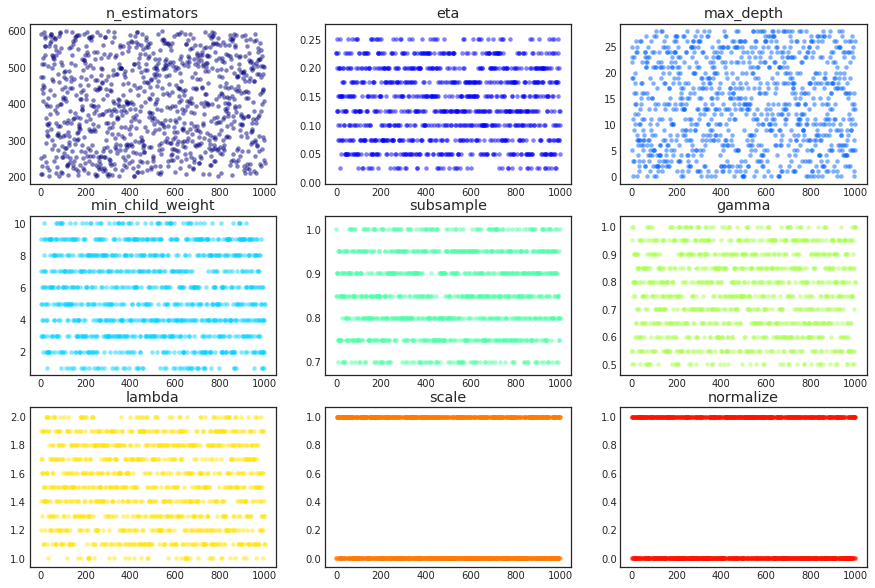

In [555]:
# parameters vs time plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

for index, value in enumerate(parameters):
    
    xs = [t['tid'] for t in tpe_rand_trials.trials]
    ys = np.array([t['misc']['vals'][value] for t in tpe_rand_trials.trials]).ravel()

    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
    axes[int(index/3), index%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(index)/len(parameters)))
    axes[int(index/3), index%3].set_title(value)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

We can see that initially the algorithm picks values from the whole range equally (uniformly), but as time goes on and more is learned about the parameter’s effect on the objective function, the algorithm focuses more and more on areas in which it thinks it will gain the most  accuracy (the goal of HyperOpt). It still explores the whole solution space, but less frequently.

#### accuracy (negative loss) vs parameters plot

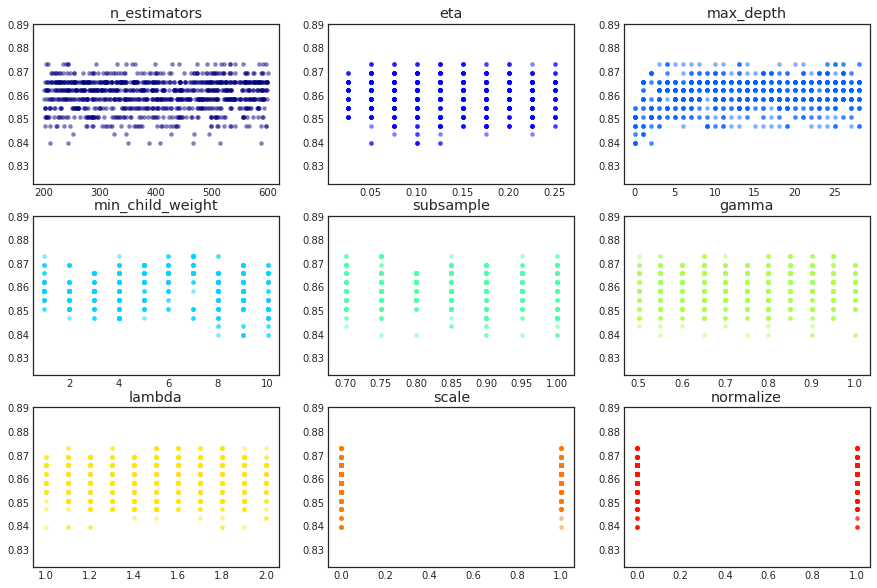

In [556]:
# accuracy (negative loss) vs parameters plot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

for index, value in enumerate(parameters):
    
    xs = np.array([t['misc']['vals'][value] for t in tpe_rand_trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in tpe_rand_trials.trials]
    
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    
    axes[int(index/3), index%3].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(index)/len(parameters)))
    axes[int(index/3), index%3].set_title(value)
    #axes[i/3,i%3].set_ylim([0.9,1.0])

### Training again on the best result obtained from HyperOpt Random algorithm Search

In [171]:
# XGB classifier trained again on the best_parameters found from Random algorithm using Accuracy as evaluation metric
params = best_parameters_rand

model = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
model.fit(train_X, train_y)

XGBClassifier(alpha=2.0, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.75, eta=0.125, gamma=0.55,
       lambda=1.9000000000000001, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=6.0, missing=None, n_estimators=373,
       n_jobs=-1, normalize=0, nthread=None, objective='binary:logistic',
       random_state=21, reg_alpha=0, reg_lambda=1, scale=0,
       scale_pos_weight=1, seed=21, silent=True, subsample=0.9)

### Prediction

In [172]:
# Train & test score on validation data
print ('Train Accuracy: ', np.round(model.score( train_X , train_y )*100, 2) , '\nTest Accuracy on validation data: ', np.round(model.score( valid_X , valid_y )*100, 2))

Train Accuracy:  92.62 
Test Accuracy on validation data:  80.97


We got the best accuracy of `80.97%` from HyperOpt `rand.suggest algorithm` when using `Accuracy` as an evaluation metric. It's a little bit strange to get `similar validation accuracy` through `Random search` rather than using Tree Parzen Estimator. Anyhow, it's an empirical observation and varies depending on data and experiment setup.

| Algorithm                             | Evaluation Metric  | Best Accuracy  |
|:-------------------------------------:|:------------------:|:--------------:|
| HyperOpt tpe.suggest algorithm      |   Accuracy       |   80.06%     |
| HyperOpt tpe.suggest algorithm      |   AUC            |   80.97%     |
| HyperOpt rand.suggest algorithm      |   Accuracy       |   80.97%     |

In [572]:
tpe_auc_trials_df = tpe_acc_trials_df = tpe_rand_trials_df = pd.DataFrame(columns=parameters)
    
# tpe.suggest using AUC evaluation metric
tpe_auc_trials_df.loc[:, 'loss'] = [-t['result']['loss'] for t in tpe_auc_trials.trials]
tpe_auc_trials_df.loc[:, 'iteration'] = [t['tid']+1 for t in tpe_auc_trials.trials]
for value in parameters:
    tpe_auc_trials_df[value] = np.array([t['misc']['vals'][value] for t in tpe_auc_trials.trials])
tpe_auc_trials_df = tpe_auc_trials_df.sort_values('loss', ascending = True)

# tpe.suggest using accuracy evaluation metric
tpe_acc_trials_df.loc[:, 'loss'] = [-t['result']['loss'] for t in tpe_acc_trials.trials]
tpe_acc_trials_df.loc[:, 'iteration'] = [t['tid']+1 for t in tpe_acc_trials.trials]
for value in parameters:
    tpe_acc_trials_df[value] = np.array([t['misc']['vals'][value] for t in tpe_acc_trials.trials])
tpe_acc_trials_df = tpe_acc_trials_df.sort_values('loss', ascending = True)

# rand.suggest using accuracy evaluation metric
tpe_rand_trials_df.loc[:, 'loss'] = [-t['result']['loss'] for t in tpe_rand_trials.trials]
tpe_rand_trials_df.loc[:, 'iteration'] = [t['tid']+1 for t in tpe_rand_trials.trials]
for value in parameters:
    tpe_rand_trials_df[value] = np.array([t['misc']['vals'][value] for t in tpe_rand_trials.trials])
tpe_rand_trials_df = tpe_rand_trials_df.sort_values('loss', ascending = True)

### 5.2.5.3 Kernel Density Estimation (KDE) plots for the different HyperOpt trials 

kernel density estimation is a non-parametric way to estimate the probability density function of a random variable using kernels eg. Gaussian. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 
 
* **TPE AUC** : HyperOpt TPE algorithm Search with Area Under Curve (`AUC`) as an evaluation metric.
* **TPE ACC** : HyperOpt TPE algorithm Search with Accuracy (`ACC`) as an evaluation metric.         
* **RAND ACC** : HyperOpt Random algorithm Search with Accuracy (`ACC`) as an evaluation metric.


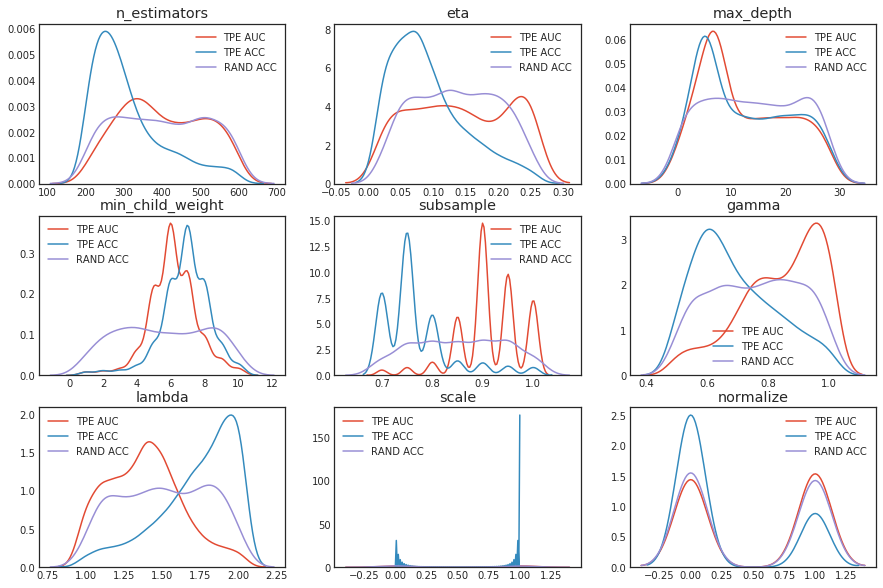

In [573]:
# KDE density plot for different HyperOpt trials like 'tpe_auc_trials', 'tpe_acc_trials', 'tpe_rand_trials'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
cmap = plt.cm.jet

# Iterating over different trials & parameters
for tpe_trials_name, tpe_trials in zip(['TPE AUC', 'TPE ACC', 'RAND ACC'], [tpe_auc_trials, tpe_acc_trials, tpe_rand_trials]):
    
    for index, value in enumerate(parameters):

        xs = np.array([t['misc']['vals'][value] for t in tpe_trials.trials]).ravel()
        sns.kdeplot(xs , ax=axes[int(index/3), index%3], label='{}'.format(tpe_trials_name))
        axes[int(index/3), index%3].set_title(value)

#### Best HyperOpt Search Params & Accuracy

`best_parameters_auc` =  {`scale`: 1, `normalize`: 1, `max_depth`: 7, `gamma`: 0.9500000000000001, `eta`: 0.1, `lambda`: 1.2000000000000002, `colsample_bytree`: 0.8, `min_child_weight`: 6.0, `subsample`: 0.9, `alpha`: 9.0, `n_estimators`: 481}

`Accuracy` on the best Bayes Search parameters: `80.97%`

Please check the following articles for further information on HyperOpt.

* [Parameter Tuning with Hyperopt](https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce)
* [Optimizing hyperparams with hyperopt](http://fastml.com/optimizing-hyperparams-with-hyperopt/)
* [Hyperopt: A Python Library for Optimizing the Hyperparameters of Machine Learning Algorithms](http://conference.scipy.org/proceedings/scipy2013/pdfs/bergstra_hyperopt.pdf)
---

### 5.2.6 Hyperopt optimization for sklearn

Hyperopt-sklearn is Hyperopt-based model selection among machine learning algorithms in scikit-learn.

In [218]:
from hpsklearn import HyperoptEstimator, xgboost_classification

# Instantiate a HyperoptEstimator with the search space and number of evaluations

OMP_NUM_THREADS = 1
estim = HyperoptEstimator(classifier=xgboost_classification('my_clf'),
                          preprocessing=[],
                          algo=tpe.suggest,
                          max_evals=50)

# Search the hyperparameter space based on the data
estim.fit( train_X.values , train_y.values )

# Show the results
print( estim.score( valid_X.values , valid_y.values ) )

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely
0.8432835820895522


In [220]:
# Show the best model configuration
print( estim.best_model() )

{'learner': XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.6784680393228346,
       colsample_bytree=0.6322012782428059, gamma=0.019852625537731806,
       learning_rate=0.003516970950751839, max_delta_step=0, max_depth=9,
       min_child_weight=4, missing=nan, n_estimators=3200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.0004048669999064751, reg_lambda=2.639301648188615,
       scale_pos_weight=1, seed=2, silent=True,
       subsample=0.6329954216283996), 'preprocs': (), 'ex_preprocs': ()}


### Conclusions about optimization

Bayesian model-based optimization is intuitive: choose the next input values to evaluate based on the past results to concentrate the search on more promising values. The end outcome is a reduction in the total number of search iterations compared to uninformed random or grid search methods. Although this was only a simple example, we can take the concepts here and use them in a wide variety of useful situations.

Key takeaways:

* Bayesian Optimization is an efficient method for finding the minimum of a function that works by constructing a probabilistic (surrogate) model of the objective function.
* The surrogate is informed by past search results and, by choosing the next values from this model, the search is concentrated on promising values.
* The overall outcome of these method is reduced search time and better values.

## 5.3 Feature Selection - Again (Described in 3.5 section)

Selecting the optimal features in the model. We will again try to evaluate what the most important variables are for the model to make the prediction.

Feature ranking can be incredibly useful in a number of machine learning and data mining scenarios. The key though is to have the end goal clearly in mind and understand which method works best for achieving it. 

When selecting top features for model performance improvement, it is easy to verify if a particular method works well against alternatives simply by doing cross-validation. It’s not as straightforward when using feature ranking for data interpretation, where stability of the ranking method is crucial and a method that doesn’t have this property (such as lasso) could easily lead to incorrect conclusions. 

What can help there is subsampling the data and running the selection algorithms on the subsets. If the results are consistent across the subsets, it is relatively safe to trust the stability of the method on this particular data and therefore straightforward to interpret the data in terms of the ranking.

Please check the following articles for further information on Feature Selection.

- [Selecting good features](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)

# 6. Competition Time

Now we have `found` the `important features` and `best model configuration`. It's time to train the model again on all available data (as model is already tuned for hyperparameters) and submit the prediction.

## 6.1 Training again on the best result obtained from all the Search

In [261]:
# XGB classifier trained again on the best_parameters found from Random algorithm using Accuracy as evaluation metric
# params = {'alpha': 0.0, 'colsample_bytree': 0.9, 'n_estimators': 305, 'lambda': 1.9000000000000001, 'eta': 0.07500000000000001, 'min_child_weight': 5.0, 'max_depth': 23, 'gamma': 0.9500000000000001, 'subsample': 0.7000000000000001}
params = {'alpha': 7.0, 'colsample_bytree': 0.75, 'n_estimators': 366, 'lambda': 1.3, 'eta': 0.25, 'min_child_weight': 5.0, 'max_depth': 13, 'gamma': 0.5, 'subsample': 0.7000000000000001}


model = XGBClassifier(**params, n_jobs=-1, objective='binary:logistic', random_state=21, seed=21, silent=True)
model.fit(train_X[features_selectfm], train_y)

XGBClassifier(alpha=7.0, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.75, eta=0.25, gamma=0.5,
       lambda=1.3, learning_rate=0.1, max_delta_step=0, max_depth=13,
       min_child_weight=5.0, missing=None, n_estimators=366, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=21,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=21, silent=True,
       subsample=0.7000000000000001)

#### Prediction on the Test data

In [262]:
# Train & test score on validation data
print ('Train Accuracy: ', np.round(model.score( train_X[features_selectfm] , train_y )*100, 2) , '\nTest Accuracy on validation data: ', np.round(model.score( valid_X [features_selectfm], valid_y )*100, 2))

Train Accuracy:  92.46 
Test Accuracy on validation data:  80.97


## 6.2 Submission 

Now we will `predict` the `survival of passangers from the test dataset` and save in a csv under PassengerId & Survived columns.

#### Using TPOT for final prediction on the test dataset.

In [269]:
# Prediction on the test data
predictions = autop.predict(test_X)

# Load Passenger Ids & save in dataframe along with predictions
passenger_id = full[891:].PassengerId
submission_df = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': predictions } )
submission_df['Survived'] = submission_df['Survived'].astype(int)
submission_df.reset_index(drop=True, inplace=True)

# Save to a csv file
submission_df.to_csv( 'titanic_submission_TPOT.csv' , index = False )

# Analyse Submitted Predictions
analyse_test_submission = test_X
analyse_test_submission.reset_index(drop=True, inplace=True)
analyse_test_submission['Survived'] = submission_df.Survived
submission_df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

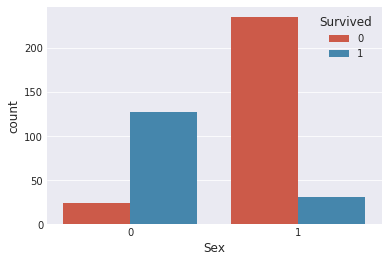

In [275]:
# Plot histogram of passangers who survived or not by
sns.countplot(x='Sex', hue='Survived', data=analyse_test_submission)

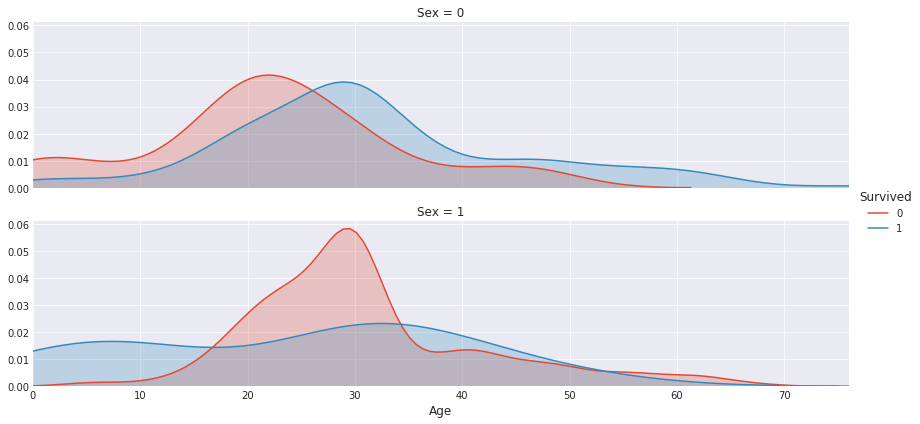

In [276]:
# Plot distributions of Age of passangers who survived or not
plot_distribution(analyse_test_submission, var = 'Age', target = 'Survived', row = 'Sex')

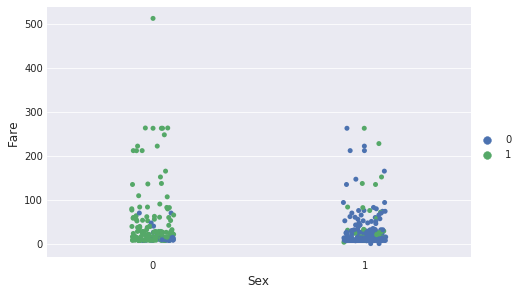

In [277]:
# Plot passangers who survived or not by Sex & Fare
seaborn = sns.FacetGrid(analyse_test_submission, size=4.2, aspect=1.6)
seaborn.map(sns.stripplot, 'Sex', 'Fare', 'Survived', palette='deep', jitter=True)
seaborn.add_legend();

## 6.2 Deployment

Deployment in this context means publishing the resulting prediction from the model to the Kaggle leaderboard. To do this do the following:

 1. select the cell below and run it by pressing the play button.
 2. Press the `Publish` button in top right corner.
 3. Select `Output` on the notebook menubar
 4. Select the result dataset and press `Submit to Competition` button

The most important step here is to check for new levels in the categorical variables of the submission dataset that are absent in the training set. We identify them and set them to a placeholder value i.e. we treat them as missing values. This ensures training consistency, as otherwise the model does not know what to do with the new levels in the submission dataset.

# 7. Further Improvements

It's now time for you to get your hands even dirtier and go at it all by yourself in a `challenge`! 

1. Try to use the creative data preprocessing steps, promising models, ensemble of them, different algorithms and compare their result
    * Experiment with stacking different input features in different ways (combinations) to understand their impact on the accuracy
    * Do this by optimizing hyperparameters
2. Try adding new features in step 3.4.1
    * Do this by adding them in to the function in the feature section.


**The winner is the one to get the highest scoring model for the validation set.**